# 1. Introduction

## 1.A. About the Company

**AWS - Amazon Web Service**

Dalam dua dekade terakhir, transformasi digital telah mendorong organisasi di seluruh dunia untuk beralih dari model tradisional menuju cloud computing sebagai fondasi utama operasional bisnis. Perusahaan kini membutuhkan infrastruktur yang aman, fleksibel, efisien, dan dapat diskalakan untuk menghadapi dinamika pasar yang terus berkembang.

Amazon Web Services (AWS), didirikan pada tahun 2006, hadir sebagai pelopor dalam industri Cloud Computing. Dengan jaringan pusat data global dan lebih dari 200 layanan berfitur lengkap, AWS dipercaya oleh jutaan pelanggan, mulai dari perusahaan rintisan (start-up), korporasi besar, hingga lembaga pemerintahan. AWS dikenal dengan pendekatan bayar sesuai penggunaan, yang memberi fleksibilitas tinggi bagi setiap organisasi untuk menyesuaikan biaya berdasarkan kebutuhan aktual.

Fokus utama AWS tidak hanya pada Infrastruktur as as Service (IaaS), tetapi juga pada model bisnis berbasis perangkat lunak, yaitu Software as a Service (SaaS). SaaS memungkinkan perusahaan untuk mengakses perangkat lunak melalui internet dengan sistem berlangganan, tanpa perlu investasi besar untuk lisensi permanen atau infrastruktur internal. Model ini mempercepat adopsi teknologi, meningkatkan efisiensi, sekaligus menurunkan hambatan masuk (barrier to entry) bagi organisasi dari berbagai skala.

Beberapa keunggulan strategis yang AWS tawarkan:
- Agility: mempercepat inovasi, iterasi produk, dan adaptasi terhadap kebutuhan pasar.
- Efisiensi Operasional: memungkinkan perusahaan untuk fokus pada inti bisnis, sementara manajemen infrastruktur ditangani oleh AWS.
- Pengalaman Pelanggan yang Lebih Baik: layanan dirancang untuk mengurangi kerumitan penggunaan, meningkatkan retensi, dan memperkuat loyalitas.
- Inovasi Berkelanjutan: membuka peluang untuk menciptakan produk dan layanan baru dengan lebih cepat.
- Respons Pasar: memberi organisasi kelincahan untuk menyesuaikan strategi sesuai perubahan perilaku pelanggan.
- Pertumbuhan Berkelanjutan: menyelaraskan seluruh aspek organisasi untuk mendukung ekspansi jangka panjang.

Dari sisi keamanan, AWS membangun infrastruktur dengan standar global tertinggi, memenuhi persyaratan ketat dari industri keuangan, pemerintahan, hingga sektor pertahanan. Hal ini memberi jaminan kepada pelanggan bahwa inovasi dan ekspansi bisnis dapat dilakukan tanpa mengorbankan kerahasiaan maupun integritas data.

Saat ini, jaringan AWS telah hadir di berbagai region global, mencakup lebih dari 48 negara, dan terus diperluas untuk mendukung permintaan layanan cloud yang meningkat. Posisi AWS sebagai pemimpin pasar memberikan peluang besar untuk memperkuat kontribusi profit, terutama melalui optimalisasi produk SaaS yang menjadi tulang punggung inovasi digital.

**Rumusan Masalah:**

1. Bagaimana perkembangan penjualan (Sales) dan profit dari waktu ke waktu?
2. Bagaimana hubungan antara diskon (discount) dan margin/profitabilitas? Apakah diskon besar benar-benar mendorong sales atau justru menekan profit?
3. Bagaimana pola pemberian discount di berbagai negara dan region?
4. Region mana yang paling berkontribusi terhadap sales dan profit, dan apakah kontribusi itu sustainable?
5. Bagaimana dengan sistem pricing produk AWS?

**Goals:**
Mengidentifikasi pola pertumbuhan sales, profit, serta dampak strategi diskon dan pricing lintas region untuk menilai efektivitas kontribusi tiap segmen/negara.
Memberikan rekomendasi strategi pricing yang lebih sehat dan berkelanjutan agar profitabilitas global AWS tetap terjaga.

# 2. Data Preparation
- Merupakan tahapan untuk mempersiapkan data agar dapat digunakan dalam analisis dan pemodelan. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

## 2.A. Data Understanding

In [2]:
df = pd.read_csv('Downloads/SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
# dictionary deskripsi kolom
descriptions = {
    "Row ID": "Unique identifier for each transaction",
    "Order ID": "Unique identifier for each order",
    "Order Date": "Date when the order was placed",
    "Date Key": "Numerical representation of the order date (YYYYMMDD)",
    "Contact Name": "Name of the person who placed the order",
    "Country": "Country where the order was placed",
    "City": "City where the order was placed",
    "Region": "Region where the order was placed",
    "Subregion": "Subregion where the order was placed",
    "Customer": "Name of the company that placed the order",
    "Customer ID": "Unique identifier for each customer",
    "Industry": "Industry the customer belongs to",
    "Segment": "Customer segment (SMB, Strategic, Enterprise, etc.)",
    "Product": "Product ordered",
    "License": "License key for the product",
    "Sales": "Total sales amount for the transaction",
    "Quantity": "Total number of items in the transaction",
    "Discount": "Discount applied to the transaction",
    "Profit": "Profit from the transaction"
}

# buat dataframe data dictionary
data_dict = pd.DataFrame({
    "Column": df.columns,
    "Dtype": df.dtypes.astype(str),
    "Description": [descriptions.get(col, "") for col in df.columns]
}).reset_index(drop=True)

data_dict

,Column,Dtype,Description
0,Row ID,int64,Unique identifier for each transaction
1,Order ID,object,Unique identifier for each order
2,Order Date,object,Date when the order was placed
3,Date Key,int64,Numerical representation of the order date (YY...
4,Contact Name,object,Name of the person who placed the order
5,Country,object,Country where the order was placed
6,City,object,City where the order was placed
7,Region,object,Region where the order was placed
8,Subregion,object,Subregion where the order was placed
9,Customer,object,Name of the company that placed the order


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

**Data Information:**

- `Row ID` hanya berfungsi seperti index (1–9994) dan tidak memberikan informasi unik. Kolom ini bisa dihapus.
- `Order ID` memiliki duplikasi karena satu transaksi/checkout bisa berisi beberapa produk. Artinya, Order ID tidak unik per baris, tapi tetap berguna sebagai pengelompok transaksi.
- `Order Date` dan `Date Key` berisi informasi yang sama dalam format berbeda (DD/MM/YYYY vs YYYYMMDD). Kolom Date Key bisa dihapus untuk menghindari redundansi, sedangkan kolom Order Date bisa diubah data typenya menjadi date. 
- `Customer ID` masih bertipe integer, padahal lebih tepat disimpan sebagai tipe object/string karena merepresentasikan identitas pelanggan, bukan angka untuk perhitungan.

## 2.B. Data Cleaning 

In [5]:
# Removing coloumns yang tidak digunakan 
df.drop(columns=['Date Key', 'Row ID'], inplace= True)
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [6]:
# Menampilkan ringkasan statistik deskriptif dari sebuah DataFrame atau Series
df.describe()

,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1049.771963,229.858001,3.789574,0.156203,28.656896
std,29.719388,623.245101,2.225110,0.206452,234.260108
min,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,1076.000000,209.940000,5.000000,0.200000,29.364000
max,1101.000000,22638.480000,14.000000,0.800000,8399.976000


**Descriptive Data Information:**
- Dataset memiliki 5 kolom numerik bertipe integer dan float.
- Kolom `Customer ID` seharusnya bertipe object/string, sehingga perlu dilakukan konversi untuk mencegah perhitungan statistik yang tidak relevan.
- Kolom `Sales` menunjukkan nilai maksimum sebesar 22,638.48, yang menandakan adanya transaksi dengan nilai penjualan yang cukup besar.
- Kolom `Quantity` memiliki nilai minimum 1 (setiap transaksi minimal 1 unit) dan maksimum 14 unit.
- Kolom `Discount` mencapai nilai maksimum 0.80, yang berarti pernah diberikan diskon hingga 80%.
- Kolom `Profit` memiliki nilai minimum –6,599.97, menandakan terdapat transaksi dengan kerugian cukup besar.

## 2.C. Data Change

In [7]:
# Mengubah tipe data Customer ID dari int ke object 
df['Customer ID'] = df['Customer ID'].astype(str)

In [8]:
# Mengubah tipe data Order Date dari object menjadi date 
df['Order Date'] = pd.to_datetime(df['Order Date'], format = "%m/%d/%Y")

In [9]:
# Pengecekkan data setalah penghapusan kolom dan pengubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

## 2.D. Consistency Data Check


Untuk memastikan kualitas data, dilakukan pengecekan NaN dan jumlah nilai unik per kolom.
Jika menggunakan kode manual seperti:
- df.isnull().any()
- sorted(df['Country'].unique())
- sorted(df['City'].unique())
- sorted(df['Region'].unique())
- sorted(df['Subregion'].unique())
- sorted(df['Customer'].unique())
- sorted(df['Segment'].unique())
- sorted(df['Industry'].unique())

Maka hasilnya akan panjang dan kurang efisien.

In [10]:
# Untuk memunculkan semua sample yang ada di coloumn 
pd.set_option('display.max_colwidth', None)

# Untuk mempersingkat pengecekan NaN dan Unique value pada masing-masing kolom
pd.DataFrame({
    'Data Type': df.dtypes,
    'N/A': df.isnull().any(),
    'Unique Values': df.nunique(),
    'Sample': [sorted(df[col].unique()) for col in df.columns]
})

,Data Type,N/A,Unique Values,Sample
Order ID,object,False,5009,"[AMER-2020-100090, AMER-2020-100279, AMER-2020-100363, AMER-2020-100762, AMER-2020-100860, AMER-2020-100867, AMER-2020-101175, AMER-2020-101392, AMER-2020-101462, AMER-2020-101560, AMER-2020-101931, AMER-2020-102071, AMER-2020-102085, AMER-2020-102295, AMER-2020-102330, AMER-2020-102652, AMER-2020-103310, AMER-2020-103338, AMER-2020-103373, AMER-2020-103401, AMER-2020-103660, AMER-2020-103702, AMER-2020-103940, AMER-2020-104178, AMER-2020-104269, AMER-2020-104563, AMER-2020-104780, AMER-2020-104808, AMER-2020-104976, AMER-2020-105137, AMER-2020-105172, AMER-2020-105249, AMER-2020-105270, AMER-2020-105648, AMER-2020-105984, AMER-2020-106264, AMER-2020-106334, AMER-2020-106376, AMER-2020-106439, AMER-2020-106572, AMER-2020-106726, AMER-2020-107139, AMER-2020-107181, AMER-2020-107398, AMER-2020-107594, AMER-2020-107699, AMER-2020-107755, AMER-2020-107818, AMER-2020-108189, AMER-2020-108609, AMER-2020-108861, AMER-2020-108903, AMER-2020-109036, AMER-2020-109134, AMER-2020-109218, AMER-2020-109232, AMER-2020-109302, AMER-2020-109456, AMER-2020-109890, AMER-2020-109897, AMER-2020-109918, AMER-2020-110072, AMER-2020-110184, AMER-2020-110527, AMER-2020-110674, AMER-2020-110786, AMER-2020-110849, AMER-2020-111003, AMER-2020-111059, AMER-2020-111192, AMER-2020-111360, AMER-2020-111857, AMER-2020-111871, AMER-2020-111962, AMER-2020-112291, AMER-2020-112795, AMER-2020-112837, AMER-2020-112851, AMER-2020-113047, AMER-2020-113271, AMER-2020-113320, AMER-2020-113383, AMER-2020-113579, AMER-2020-113768, AMER-2020-114125, AMER-2020-114195, AMER-2020-114433, AMER-2020-114643, AMER-2020-115056, AMER-2020-115133, AMER-2020-115161, AMER-2020-115259, AMER-2020-115357, AMER-2020-115812, AMER-2020-115889, AMER-2020-115973, AMER-2020-116239, AMER-2020-116673, AMER-2020-116785, AMER-2020-116834, ...]"
Order Date,datetime64[ns],False,1237,"[2020-01-04 00:00:00, 2020-01-05 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00, 2020-01-10 00:00:00, 2020-01-11 00:00:00, 2020-01-12 00:00:00, 2020-01-14 00:00:00, 2020-01-15 00:00:00, 2020-01-16 00:00:00, 2020-01-17 00:00:00, 2020-01-19 00:00:00, 2020-01-20 00:00:00, 2020-01-21 00:00:00, 2020-01-22 00:00:00, 2020-01-24 00:00:00, 2020-01-27 00:00:00, 2020-01-28 00:00:00, 2020-01-29 00:00:00, 2020-01-31 00:00:00, 2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00, 2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00, 2020-02-12 00:00:00, 2020-02-13 00:00:00, 2020-02-15 00:00:00, 2020-02-16 00:00:00, 2020-02-17 00:00:00, 2020-02-18 00:00:00, 2020-02-19 00:00:00, 2020-02-21 00:00:00, 2020-02-22 00:00:00, 2020-02-23 00:00:00, 2020-02-24 00:00:00, 2020-02-25 00:00:00, 2020-02-28 00:00:00, 2020-03-01 00:00:00, 2020-03-02 00:00:00, 2020-03-03 00:00:00, 2020-03-04 00:00:00, 2020-03-05 00:00:00, 2020-03-07 00:00:00, 2020-03-10 00:00:00, 2020-03-11 00:00:00, 2020-03-14 00:00:00, 2020-03-15 00:00:00, 2020-03-16 00:00:00, 2020-03-17 00:00:00, 2020-03-18 00:00:00, 2020-03-19 00:00:00, 2020-03-21 00:00:00, 2020-03-22 00:00:00, 2020-03-23 00:00:00, 2020-03-24 00:00:00, 2020-03-25 00:00:00, 2020-03-26 00:00:00, 2020-03-28 00:00:00, 2020-03-29 00:00:00, 2020-03-30 00:00:00, 2020-03-31 00:00:00, 2020-04-01 00:00:00, 2020-04-02 00:00:00, 2020-04-03 00:00:00, 2020-04-04 00:00:00, 2020-04-05 00:00:00, 2020-04-06 00:00:00, 2020-04-07 00:00:00, 2020-04-08 00:00:00, 2020-04-11 00:00:00, 2020-04-12 00:00:00, 2020-04-13 00:00:00, 2020-04-15 00:00:00, 2020-04-16 00:00:00, 2020-04-18 00:00:00, 2020-04-19 00:00:00, 2020-04-20 00:00:00, 2020-04-21 00:00:00, 2020-04-22 00:00:00, 2020-04-23 00:00:00, 2020-04-25 00:00:00, 2020-04-26 00:00:00, 2020-04-28 00:00:00, 2020-04-29 00:00:00, 2020-04-30 00:00:00, 2020-05-02 00:00:00, 2020-05-03 00:00:00, 2020-05-04 00:00:00, 2020-05-05 00:00:00, 2020-05-06 00:00:00, 2020-05-07 00:00:00, 2020-05-08 00:00:00, 2020-05-09 00:00:00, 2020-05-10 00:00:00, 2020-05-11 

## 2.E. Duplication Data Check 

In [11]:
df[['Customer ID', 'Customer']].drop_duplicates()

,Customer ID,Customer
0,1017,Chevron
2,1056,Phillips 66
3,1031,Royal Dutch Shell
5,1065,BNP Paribas
12,1062,Engie
...,...,...
676,1071,News Corp.
689,1016,Caterpillar
762,1020,Citigroup
842,1091,Panasonic


In [12]:
df.drop_duplicates()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


**Drop Duplicates Analysis:**

- Pengecekan kolom `Customer` vs `Customer ID` dilakukan untuk memastikan konsistensi data pelanggan. Hasilnya menunjukkan bahwa setiap `Customer ID` selalu berpasangan dengan tepat satu `Customer`, sehingga tidak ada inkonsistensi mapping.
- `Customer ID` adalah kode numerik unik yang berfungsi sebagai identifier pelanggan. Meskipun `Customer ID` dapat muncul berkali-kali dalam dataset (karena pelanggan yang sama bisa melakukan banyak transaksi), nilainya tetap unik untuk satu customer.
- `Customer` (nama pelanggan) dan `Customer ID` bisa digunakan saling bergantian dalam analisis. Namun, untuk analisis teknis lebih baik menggunakan `Customer ID` karena lebih konsisten, sementara `Customer` lebih cocok ditampilkan di laporan atau visualisasi.
- Penerapan `drop_duplicates()` pada dataset bertujuan untuk menghapus baris ganda (double entry), sehingga analisis tidak bias akibat duplikasi transaksi.

## 2.F. Unreasonable Value Data Check 

In [13]:
df[(df['Discount'] < 0) | (df['Discount'] > 1)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [14]:
df[(df['Quantity'] <= 0) | (df['Quantity'] > 100)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [15]:
(df[df['Sales'] <= 0])

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [16]:
(df[df['Profit'] <= 0].sort_values(by='Profit'))

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7772,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780
683,EMEA-2023-168116,2023-11-05,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904
9774,APJ-2020-169019,2020-07-26,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
3011,EMEA-2023-134845,2023-04-18,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
4991,APJ-2023-122714,2023-12-08,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,EMEA-2020-132745,2020-10-01,Victor Gill,Israel,Jerusalem,EMEA,EU-EAST,Morgan Stanley,1068,Finance,Enterprise,Storage,YSQZOKSN5B,4.710,1,0.0,0.0000
7974,EMEA-2021-126753,2021-08-16,Blake Campbell,France,Paris,EMEA,EU-WEST,AT&T,1010,Communications,Strategic,SaaS Connector Pack,2MNOP07604,254.352,3,0.2,0.0000
2347,APJ-2022-159373,2022-03-14,Ava Ellison,Japan,Osaka,APJ,JAPN,Oracle,1072,Tech,SMB,ContactMatcher,RXJM9UP67F,557.585,5,0.3,0.0000
9412,AMER-2021-164777,2021-01-27,Emily Ball,United States,New York City,AMER,NAMER,Comcast,1022,Communications,SMB,FinanceHub,XHITNZSOP1,2803.920,5,0.2,0.0000


**Analisis Unreasonable Value Data Check**

- Masing-masing kolom numerik `Discount`, `Quantity` dan `Sales` menunjukkan tidak memiliki unreasonable value pada keseluruhan dataset.
- Sedangkan kolom numerik `Profit` menunjukkan bahwa terdapat 1936 data yang memiliki negative value. Hal ini dapat berhubungan dengan besar discount yang diberikan oleh AWS pada customer. 

In [17]:
# save clean dataset as csv
# df.to_csv('SaaS_Clean_1.csv', index=False)

# 3. Exploration Data Analysis

## 3.A. Data Distribution Analysis


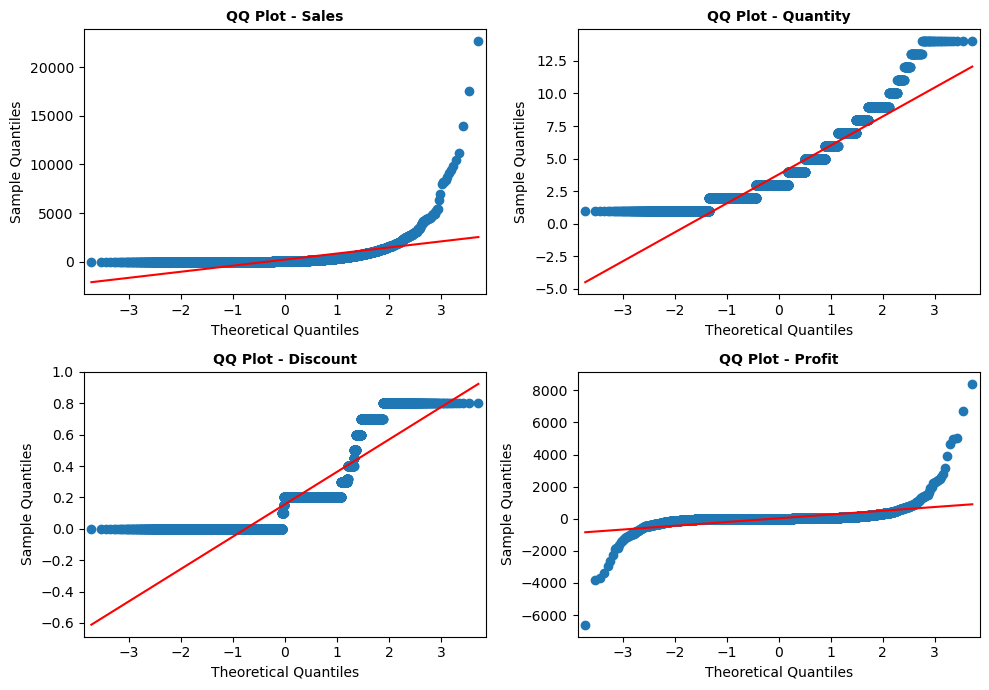

In [18]:
# Check data distribusi apakah parametrik atau non-parametrik dengan visualisasi QQplot

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Sales
sm.qqplot(df['Sales'], line='s', ax=axes[0,0])
axes[0,0].set_title("QQ Plot - Sales", fontsize=10, fontweight='bold')

# Quantity
sm.qqplot(df['Quantity'], line='s', ax=axes[0,1])
axes[0,1].set_title("QQ Plot - Quantity", fontsize=10, fontweight='bold')

# Discount
sm.qqplot(df['Discount'], line='s', ax=axes[1,0])
axes[1,0].set_title("QQ Plot - Discount", fontsize=10, fontweight='bold')

# Profit
sm.qqplot(df['Profit'], line='s', ax=axes[1,1])
axes[1,1].set_title("QQ Plot - Profit", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Distribution Analysis:**

- Keempat kolom numerik tidak mengikuti distribusi normal.
- Hal ini terutama karena outlier (nilai ekstrim), distribusi skewed, dan sifat diskrit (pada kolom Discount).
- `Sales` garisnya menunjukkan adanya pergerakan ke kanan yang meningkat, hal ini dapat dipengaruhi oleh transaksi bernilai sangat tinggi.
- `Quantity` garis menunjukkan ada pergerakan yang searah pada bagian tengah, namun ekor kanan naik lebih tinggi, hal ini dapat dipengaruhi oleh jumlah barang lebih banyak dari normal.
- `Discount` garis menunjukkan seperti anak tangga bertingkat, hal ini dapat dipengaruhi oleh beberapa kategori data yang terpisah, bukan distribusi kontinu yang mulus.
- `Profit` banyak terdapat titik dan jauh diatas garis menunjukkan adanya ditribusi yang tidak normal pada kedua sisi (menggambarkan adanya transaksi yang sangat merugikan maupun sangat menguntungkan). 

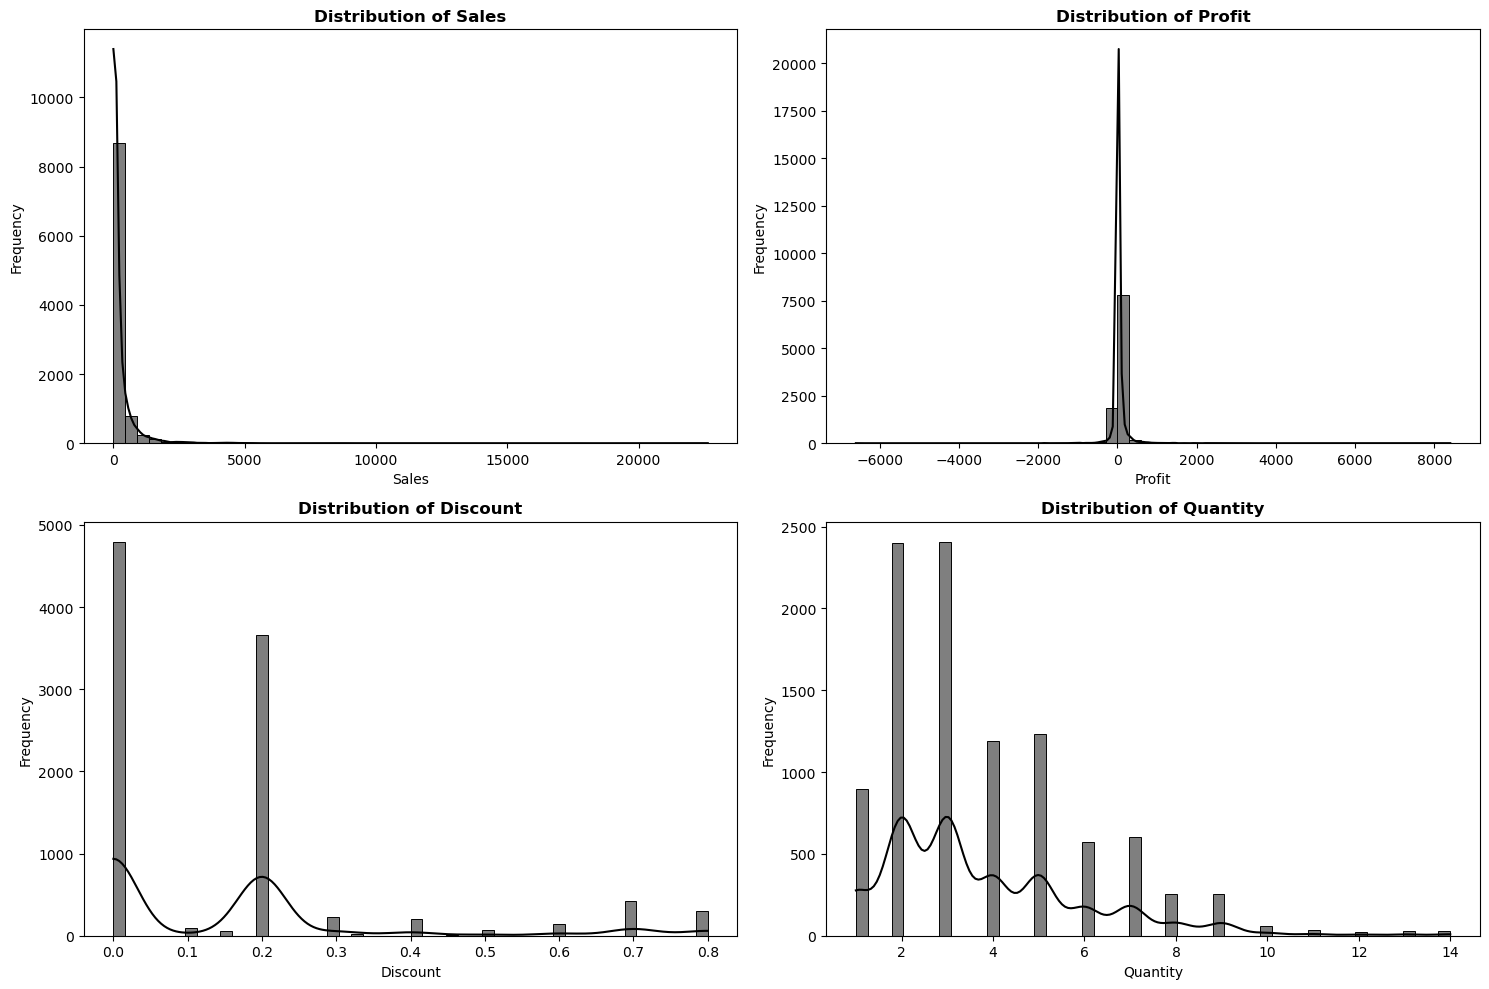

In [19]:
kolom_numerik = ['Sales', 'Profit', 'Discount', 'Quantity']

plt.figure(figsize=(15,10))

for i, col in enumerate(kolom_numerik, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], bins=50, kde=True, color='black', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency') # menunjukkan jumlah observasi per bin

plt.tight_layout()
plt.show()

**Analisa Distribution:**

`Sales`
- Distribusi sangat right-skewed (ekor panjang ke kanan).
- Mayoritas transaksi berada di nilai kecil (< 1000).

`Profit`
- Distribusi sangat peaked di sekitar 0, dengan ekor panjang ke kiri (kerugian) dan ke kanan (keuntungan besar).
- Ada banyak transaksi dengan profit kecil (mendekati 0), tetapi juga ada beberapa transaksi dengan kerugian besar dan keuntungan besar.
- Menandakan bisnis berisiko tinggi: sebagian besar transaksi margin tipis, tapi ada transaksi tertentu yang sangat merugikan atau sangat menguntungkan.

`Discount`
- Distribusinya bukan kontinu, terlihat dari pola “loncatan” pada 0.0, 0.2, 0.5, 0.7, 0.8.
- Mayoritas transaksi tanpa diskon (0%) atau diskon standar (20%).
- Ada juga kasus ekstrim dengan diskon 80%, yang kemungkinan besar berkontribusi terhadap profit negatif.

`Quantity`
- Distribusi memiliki beberapa puncak, terutama di angka 2, 3.
- Sebagian besar transaksi berada di kisaran 1–4 unit, hanya sedikit transaksi dengan jumlah > 10 unit.
- Pelanggan cenderung membeli dalam jumlah kecil per transaksi (retail-like behavior), dengan sedikit outlier bulk order.

In [20]:
kolom=['Sales','Quantity', 'Discount', 'Profit']
from statsmodels.stats.diagnostic import lilliefors


for i in kolom: 
    stat, pvalue = lilliefors(df[i])
    if pvalue > 0.05:
        print(f"{i} p-value = {pvalue:.4f}. Gagal menolak H0. Berarti data terdistribusi normal")
    else: 
        print(f"{i} p-value = {pvalue:.4f}. berhasil menolak H0. Berarti data tidak terdistribusi normal")

Sales p-value = 0.0010. berhasil menolak H0. Berarti data tidak terdistribusi normal
Quantity p-value = 0.0010. berhasil menolak H0. Berarti data tidak terdistribusi normal
Discount p-value = 0.0010. berhasil menolak H0. Berarti data tidak terdistribusi normal
Profit p-value = 0.0010. berhasil menolak H0. Berarti data tidak terdistribusi normal


## 3.B. Data Outlier Analysis

In [21]:
kolom_numerik = ['Sales', 'Quantity', 'Discount', 'Profit']
outliers = {} 

for i in kolom_numerik: 
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outliers[i]=df[(df[i] < lower_bound) | (df[i] > upper_bound)].shape[0]

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns = ['Outlier Count'])

In [22]:
# Menampilkan proporsi outlier terhadap seluruh dataset.
outliers_df['Total Data'] = len(df)
outliers_df['Outlier (%)'] = (outliers_df['Outlier Count'] / outliers_df['Total Data']) * 100
outliers_df

,Outlier Count,Total Data,Outlier (%)
Sales,1167,9994,11.677006
Quantity,170,9994,1.701021
Discount,856,9994,8.565139
Profit,1881,9994,18.821293


Data diatas menunjukkan proporsi outlier dari masing-masing kolom numerik: 
- `Profit` memiliki nilai outlier paling tinggi yaitu 18.8%
    - Ini bisa menandakan adanya transaksi dengan kerugian besar atau profit tinggi tidak wajar.
- `Sales` memiliki nilai outlier kedua tertinggi yaitu 11,7%
    - Bisa berarti ada transaksi dalam jumlah besar (bulk order) atau anomali harga/penjualan
- `Discount` memiliki nilai outlier 8,6%
    - Ada cukup banyak transaksi dengan diskon ekstrem.
    - Outlier diskon ini sangat mungkin berkontribusi pada outlier di Profit.
- `Quantity` memiliki nilai outlier 1.7%
    - Sangat sedikit transaksi dengan jumlah barang yang tidak wajar.
    - Berarti quantity relatif stabil, hanya sebagian kecil yang ekstrem.

In [23]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers=df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

outliers_profit_produk = (
    outliers['Product']
    .value_counts()
    .rename(f'{'Profit'} Outliers')
    .to_frame()
)

outliers_profit_produk

,Profit Outliers
Product,
ContactMatcher,417
Site Analytics,264
FinanceHub,236
Data Smasher,160
Marketing Suite - Gold,156
OneView,137
Support,135
SaaS Connector Pack,100
Marketing Suite,94


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2308616898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit', y='Product', data=df, palette="rocket")


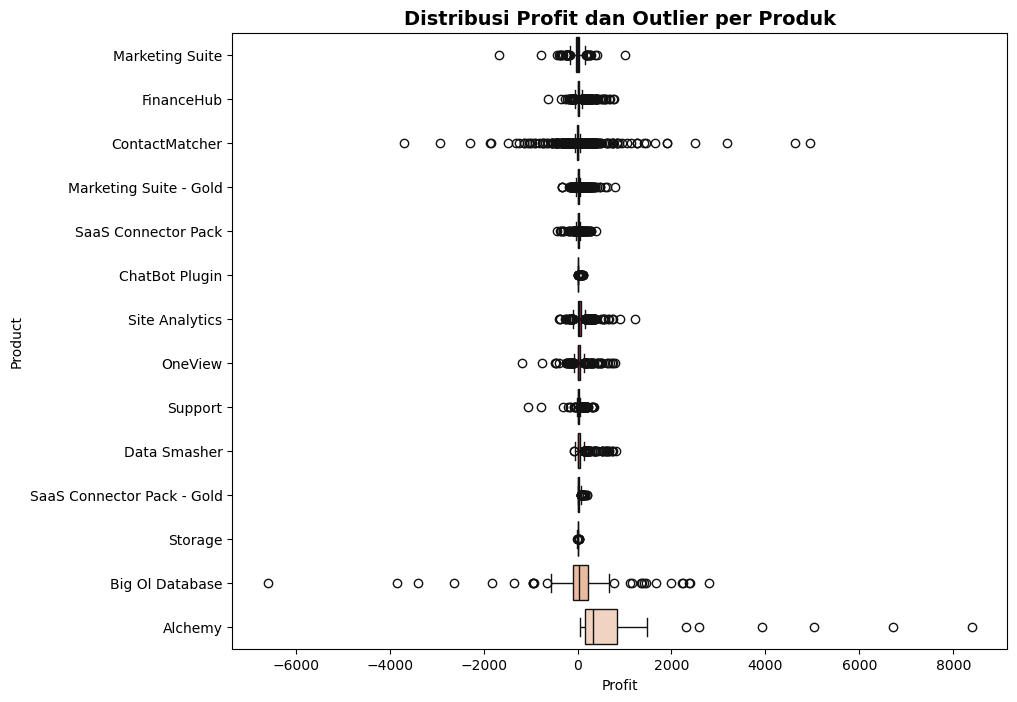

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2308616898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales', y='Product', data=df, palette="rocket")


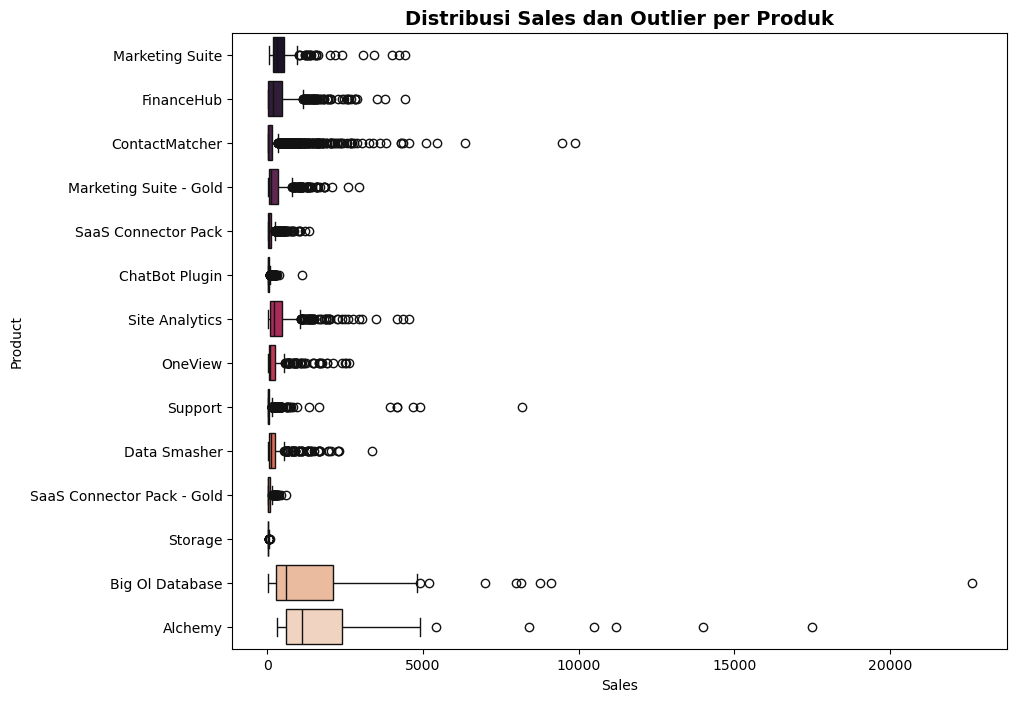

In [24]:
plt.figure(figsize=(10,8))

sns.boxplot(x='Profit', y='Product', data=df, palette="rocket")
plt.title("Distribusi Profit dan Outlier per Produk", fontsize=14, fontweight='bold')
plt.xlabel("Profit")
plt.ylabel("Product")
plt.tight_layout
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x='Sales', y='Product', data=df, palette="rocket")
plt.title("Distribusi Sales dan Outlier per Produk", fontsize=14, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("Product")

plt.tight_layout
plt.show()


**Analisa Outlier Profit dan Sales by Product:**

**Boxplot Profit by Product**
- Produk Alchemy terlihat memiliki profit outlier paling menonjol ke arah positif, sedangkan produk Big Ol Database memiliki outlier kedua arah positif maupun negatif (nilai negatif outlier hingga -6000 ini perlu adanya uji lebih lanjut apakah berkaitan dengan diskon).
- Alchemy dan Big Ol Database memiliki median profit positif dan lebih tinggi mengindikasikan bahwa produk ini driver utama profit.
- Beberapa product seperti ContactMatcher dan Marketing Suite memiliki banyak titik outlier negatif, ada kemungkinan transaksi dengan kerugian. 

Insight: profit produk tidak seragam, beberapa produk sangat berisiko (profit fluktuatif tinggi).

**Boxplot Sales by Product**
- Produk seperti Alchemy dan Big Ol Database memiliki penjualan yang jauh lebih besar dibanding produk lain bahkan sales lebih dari 20K untuk Big Ol Database.
- Ada kemungkinan bahwa product Alchemy dan Big Ol Database keduanya memberikan kontribusi sales yang besar.
- Karena datanya lebar, box (IQR) Big Ol Database dan Alchemy terlihat lebih panjang.
- Produk seperti ContactMatcher, FinanceHub, Site Analytics punya banyak transaksi sales kecil-menengah.
- Support, Storage, ChatBot Plugin, SaaS Connector Pack Gold, Marketing Suite Gold memiliki kontribusi revenue rendah tapi stabil.
  
Insight: ada gap besar antar produk → sebagian besar produk memiliki sales kecil–menengah, tapi ada sedikit transaksi dengan sales yang sangat besar.

In [25]:
kolom_numerik = ['Sales', 'Quantity', 'Discount', 'Profit']
X = df[kolom_numerik]

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

negatif_outliers = (X < lower_bound).any(axis=1)
positif_outliers = (X > upper_bound).any(axis=1)

df['Outliers'] = np.select([negatif_outliers, positif_outliers],
                        ['Negatif Outliers', 'Positif Outliers'],
                         default='No Outlier')
            
pct = (df.pivot_table(index='Product', 
                      columns='Outliers',
                      values='Sales',
                      aggfunc='size',
                      fill_value=0)
       .pipe(lambda t: t.div(t.sum(1), axis=0)*100)
       .sort_index())
pct.round(6)


Outliers,Negatif Outliers,No Outlier,Positif Outliers
Product,,,
Alchemy,0.000000,4.411765,95.588235
Big Ol Database,29.565217,15.652174,54.782609
ChatBot Plugin,0.000000,97.864322,2.135678
ContactMatcher,13.192182,47.557003,39.250814
Data Smasher,0.387097,77.548387,22.064516
FinanceHub,7.441386,68.195719,24.362895
Marketing Suite,25.877193,49.561404,24.561404
Marketing Suite - Gold,6.146572,74.704492,19.148936
OneView,9.012876,63.519313,27.467811


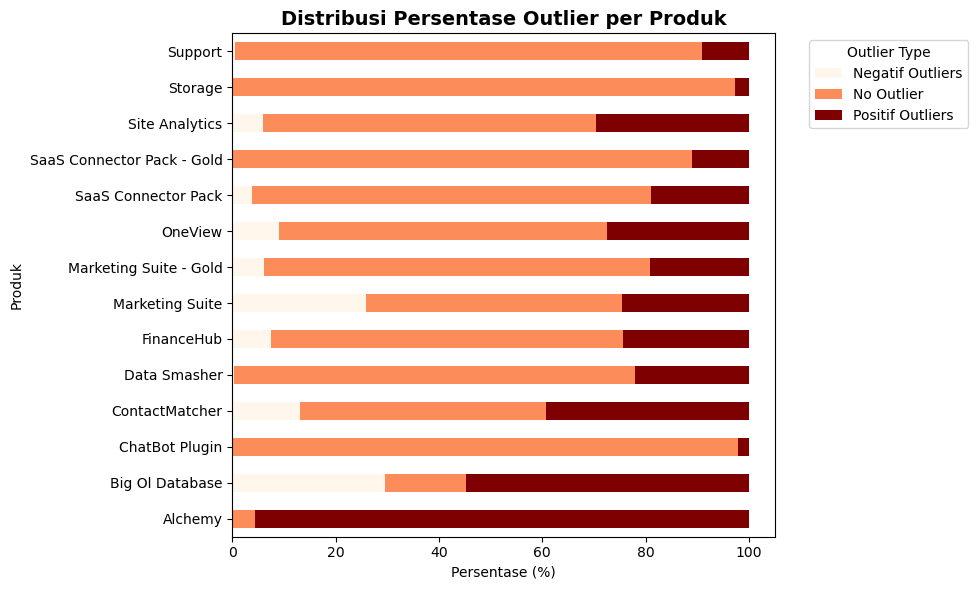

In [26]:
ax = pct.plot(kind='barh', stacked=True, figsize=(10,6), colormap="OrRd")

plt.title("Distribusi Persentase Outlier per Produk", fontsize=14, fontweight='bold')
plt.xlabel("Persentase (%)")
plt.ylabel("Produk") 
plt.legend(title="Outlier Type", bbox_to_anchor=(1.05,1),loc='upper left')

# for c in ax.containers:
#     ax.bar_label(c, fmt="%.1f%%", label_type='center', fontsize=8, color='black')
    
plt.tight_layout()
plt.show()

**Analisis Persentase Outlier per Product:**

- Tabel menunjukkan distribusi Negatif Outliers, No Outlier, dan Positif Outliers dalam bentuk persentase untuk setiap produk.
- Alchemy memiliki 95.6% outlier positif, artinya mayoritas transaksi profitnya sangat tinggi dibanding pola normal → produk ini konsisten menghasilkan profit besar.
- Big Ol Database pada peringkat ke-dua, memiliki 54.8% outlier positif. Namun tingkat outlier negatifnya cukup tinggi 29.6%, sehingga perlu dievaluasi transaksi yang menyebabkan kerugian ekstrem tersebut. 
- Marketing Suite memiliki 25.9% outlier negatif + 24.6% outlier positif. Ada kemungkinan bahwa produk ini berisiko tinggi karena profitnya sangat fluktuatif.
- ChatBot Plugin & Storage merupakan beberapa contoh product yang memiliki sebagian besar transaksi “No Outlier”. Hal ini menunjukkan bahwa produk ini stabil, meskipun profit per transaksi relatif kecil.

Analisa Tabel: 
- Produk dengan blok putih besar = banyak transaksi rugi ekstrem (contoh: Marketing Suite, Big Ol Database).
- Produk dengan blok merah besar = banyak transaksi profit ekstrem (contoh: Alchemy, Site Analytics, OneView).
- Produk dengan blok oranye dominan = stabil, tidak banyak outlier (contoh: Storage, Support, ChatBot Plugin).
- Fungsi grafik ini: untuk melihat pola risiko & potensi produk dalam satu pandangan.

**Coba cari tempat lain**
- df.groupby('Product')['Sales'].agg(['mean','median','std','count'])

- diskon_80 = df[df['Discount'] == 0.7]
- diskon_80['Product'].value_counts()

## 3.C. Non-Parametric Test

In [27]:
# Membuat tabel berdasarkan Spearman
kolom = ['Profit', 'Sales', 'Discount', 'Quantity']
spearman_test = df[kolom].corr(method = 'spearman')
spearman_test

,Profit,Sales,Discount,Quantity
Profit,1.000000,0.518407,-0.543350,0.234491
Sales,0.518407,1.000000,-0.056969,0.327426
Discount,-0.543350,-0.056969,1.000000,-0.000878
Quantity,0.234491,0.327426,-0.000878,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

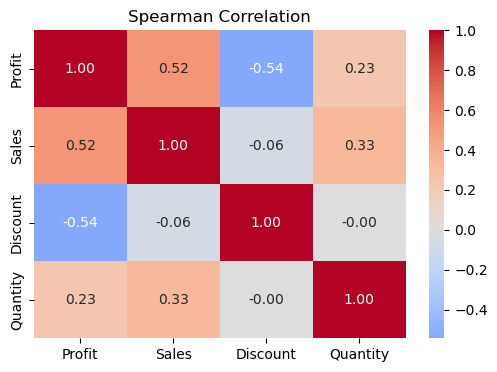

In [28]:
# Visualisasi Spearman Test
plt.figure(figsize=(6,4))
sns.heatmap(spearman_test, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Spearman Correlation")

**Analisa Spearman Test**

- Hubungan korelasi antara **Profit dan Sales** adalah 0.518, menunjukkan korelasi positif. Ini menunjukkan bahwa keduanya berkaitan, semakin tinggi penjualan maka profit cenderung naik. Namun, dengan nilai yang masih jauh dari nilai 1, maka profit tidak sepenuhnya ditentukan oleh sales.
- Hubungan korelasi antara **Profit dan Discount** adalah -0.543, menunjukkan korelasi negatif. Ini menunjukkan bahwa keduanya berkaitan namun secara negatif. Semakin besar discount maka akan mempengaruhi profit yang didapatkan.
- Hubungan korelasi antara **Profit dan Quantity** adalah 0.234, menunjukkan korelasi positif yang cenderung rendah. Ini menunjukkan bahwa jumlah unit yang terjual sedikit menaikan profit, namun tidak signifikan.
- Hubungan korelasi antara **Sales vs Discount** adalah -0.056, menunjukkan korelasi hampir nol. Ini menunjukkan bahwa diskon tidak banyak memengaruhi kenaikan sales.
- Hubungan korelasi antara **Sales vs Quantity** adalah 0.327, menunjukkan korelasi positif lemah. Ini menunjukkan bahwa semakin banyak quantity yang terjual, maka sales naik namun tidak selalu sebanding.
- Hubungan korelasi antara **Discount vs Quantity** adalah -0.0008, menunjukkan mendekati nol. Ini menunjukkan bahwa jumlah produk yang dibeli tidak ada hubungannya dengan besar diskon. 

In [29]:
# Uji Kruskal untuk numerikal kolom (Profit) dan kategorikal kolom (Region, Segment, Industry)

from scipy.stats import kruskal
uji_kruskal = ['Region', 'Segment', 'Industry']

for var in uji_kruskal: 
    groups = [df[df[var] == r]['Profit'] for r in df[var].unique()]
    stat, pval = kruskal(*groups)

    print(f"\n=== Kruskal Walis Test : Profit vs {var} ===")
    print("H-statistic:", stat)
    print("p-value:", pval)

    if pval > 0.05:
        print(f"p-value = {pval:.4f} Gagal menolak H0. Tidak ada perbedaan signifikan profit antar {var}")
    else:
        print(f"p-value = {pval:.4f} Berhasil menolak H0. Ada perbedaan signifikan profit antar {var}")


=== Kruskal Walis Test : Profit vs Region ===
H-statistic: 325.4616440231316
p-value: 2.1227652267825937e-71
p-value = 0.0000 Berhasil menolak H0. Ada perbedaan signifikan profit antar Region

=== Kruskal Walis Test : Profit vs Segment ===
H-statistic: 4.372953664040231
p-value: 0.11231174553413312
p-value = 0.1123 Gagal menolak H0. Tidak ada perbedaan signifikan profit antar Segment

=== Kruskal Walis Test : Profit vs Industry ===
H-statistic: 23.953374489860753
p-value: 0.004375636661226058
p-value = 0.0044 Berhasil menolak H0. Ada perbedaan signifikan profit antar Industry


In [30]:
# Uji Kruskal untuk numerikal kolom (Quantity) dan kategorikal kolom (Region, Segment, Industry)

uji_kruskal = ['Region', 'Segment', 'Industry']

for var in uji_kruskal: 
    groups = [df[df[var] == r]['Quantity'] for r in df[var].unique()]
    stat, pval = kruskal(*groups)

    print(f"\n=== Kruskal Walis Test : Quantity vs {var} ===")
    # print("H-statistic:", stat)
    print("p-value:", pval)

    if pval > 0.05:
        print(f"p-value = {pval:.4f} Gagal menolak H0. Tidak ada perbedaan signifikan Quantity antar {var}")
    else:
        print(f"p-value = {pval:.4f} Berhasil menolak H0. Ada perbedaan signifikan Quantity antar {var}")


=== Kruskal Walis Test : Quantity vs Region ===
p-value: 0.9204841849226458
p-value = 0.9205 Gagal menolak H0. Tidak ada perbedaan signifikan Quantity antar Region

=== Kruskal Walis Test : Quantity vs Segment ===
p-value: 0.3125377478388814
p-value = 0.3125 Gagal menolak H0. Tidak ada perbedaan signifikan Quantity antar Segment

=== Kruskal Walis Test : Quantity vs Industry ===
p-value: 0.2982876159993345
p-value = 0.2983 Gagal menolak H0. Tidak ada perbedaan signifikan Quantity antar Industry


In [31]:
# Uji Kruskal untuk numerikal kolom (Profit) dan (Discount)

kruskal_dp = [df[df['Discount'] == d]['Profit'] for d in df['Discount'].unique()]

# Uji Kruskal-Wallis
stat, pval = kruskal(*kruskal_dp)

print("\n=== Kruskal-Wallis Test: Profit vs Discount ===")
print(f"p-value: {pval}")

alpha = 0.05
if pval > 0.05:
    print(f"p-value = {pval:.4f} Gagal menolak H0. Tidak ada perbedaan signifikan Profit antar level Discount")
else:
    print(f"p-value = {pval:.4f} Berhasil menolak H0. Ada perbedaan signifikan Profit antar level Discount")


=== Kruskal-Wallis Test: Profit vs Discount ===
p-value: 0.0
p-value = 0.0000 Berhasil menolak H0. Ada perbedaan signifikan Profit antar level Discount


In [32]:
# Uji Chi-Square untuk uji kategorikal apakah ada hubungan/asosiasi antara dua variable

crosstab = pd.crosstab(df['Industry'], df['Region'])
# print("Cross Tabulation Industry dan Region")
crosstab

# Uji Chi Square 
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print("\n=== Chi-Square Test: Industry vs Region ===")
print(f"Chi Statistics: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p}")

expected_df = pd.DataFrame(expected, 
                           index=crosstab.index,
                           columns=crosstab.columns)
expected_df

# interpretation H0,H1
alpha = 0.05
if p > alpha:
    print (f"p-value = {pval:.4f} Tidak terdapat hubungan antara dua kategorikal kolom Industry dan Region")
else: 
    print(f"p-value = {pval:.4f} Terdapat hubungan antara dua kategorikal kolom Industry dan Region")


=== Chi-Square Test: Industry vs Region ===
Chi Statistics: 68.08414127342812
Degrees of Freedom: 18
p-value: 9.506224852378769e-08
p-value = 0.0000 Terdapat hubungan antara dua kategorikal kolom Industry dan Region


**Analisa Kruskal-Wallis dan Chi-square:**

- Profit dipengaruhi oleh Region & Industry, bukan oleh Segment. Faktor geografis dan industri jauh lebih menentukan profitabilitas.
- Quantity stabil, tapi profit berbeda
- Discount berperan besar dalam menentukan profit
- Distribusi industri per region tidak merata setiap region punya spesialisasi industri. Strategi pricing & penjualan harus disesuaikan per region dan industri, bukan hanya per segmen customer.


## 3.D. Comparative Data Analysis/Descriptive Statistics per Group

In [33]:
df.groupby('Region')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AMER,3665.0,34.768619,220.450714,-6599.9780,3.496500,10.9494,33.2156,6719.9808
APJ,2110.0,5.456866,272.876931,-3701.8928,-8.070625,3.6956,19.1232,8399.9760
EMEA,4219.0,34.950473,224.109423,-3839.9904,2.140100,9.0720,31.6756,4630.4755


**Analisis Profit Berdasarkan Region:**

- Konfirmasi hasil Kruskal-Wallis yang dilakukan sebelumnya bahwa Profit dipengaruhi oleh Region.
- AMER & EMEA  median profit relatif mirip (~9–11), cukup mirip, dan lebih stabil (std ~220).
- APJ memiliki median profit jauh lebih rendah (3.7) dengan standar deviasi tinggi (272). Ada transaksi yang sangat merugikan (min -3700) maupun sangat menguntungkan (max 8399)

Insight: APJ adalah region paling berisiko, sementara AMER & EMEA lebih konsisten.

In [34]:
df.groupby('Industry')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Communications,593.0,23.568872,159.960416,-1237.8462,1.017000,6.90880,22.869000,2229.0240
Consumer Products,1021.0,36.256619,355.449135,-950.4000,1.122000,7.68000,23.316000,8399.9760
Energy,1316.0,34.409053,210.958577,-1002.7836,1.670400,7.61380,27.342450,4946.3700
Finance,2127.0,23.671354,227.095959,-6599.9780,2.035800,9.08820,31.092400,3919.9888
Healthcare,1049.0,30.475780,219.800346,-1811.0784,1.814400,8.86080,29.988000,4630.4755
Manufacturing,1222.0,31.434621,199.286255,-2929.4845,1.804275,8.79255,32.468700,2799.9840
Misc,107.0,66.949804,275.871055,-320.2395,2.341500,15.18500,43.082250,2591.9568
Retail,972.0,31.078005,258.535767,-3839.9904,2.244750,9.33120,30.650650,5039.9856
Tech,1236.0,19.915084,184.951126,-3701.8928,1.952775,8.98300,28.667475,2504.2216


**Analisis Profit Berdasarkan Industry:**

- Konfirmasi hasil Kruskal-Wallis yang dilakukan sebelumnya bahwa Profit dipengaruhi oleh Industry.
- Misc (mean 66.9) merupakan industri dengan profit median profit tertinggi (15.2), meskipun jumlah transaksi kecil (count 107).
- Consumer Products, Energy, Healthcare, Manufacturing, Retail memiliki median profit stabil di kisaran 7–9, dengan volume transaksi cukup besar.
- Finance & Communications memiliki median profit lebih rendah (~7), tapi tetap positif.
- Tech & Transportation menempati tingkat profit paling rendah (~7-9), cukup berisiko dengan std tinggi (± 185–247).

Insight: Consumer Products dan Retail menjadi core business dengan volume besar dan margin stabil, sedangkan Misc menunjukkan profit tinggi namun dengan kontribusi volume rendah.

In [35]:
df.groupby('Discount')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0.00,4798.0,66.900292,257.055445,0.0000,6.57540,15.9952,50.365800,8399.9760
0.10,94.0,96.055074,130.070966,-8.0980,14.24905,54.3240,133.565850,679.9960
0.15,52.0,27.288298,60.746393,-40.1960,-12.09800,14.0980,29.581300,225.7350
0.20,3657.0,24.702572,117.828652,-1049.3406,1.84680,6.4944,21.420000,3919.9888
0.30,227.0,-45.679636,68.070002,-630.8820,-66.12230,-25.3764,-9.122250,156.0470
0.32,27.0,-88.560656,103.439178,-437.5404,-105.62430,-46.9764,-18.966600,-6.0196
0.40,206.0,-111.927429,237.996818,-1862.3124,-138.10410,-57.6242,-14.771350,1119.9968
0.45,11.0,-226.646464,137.543658,-458.1468,-319.30925,-167.3184,-112.558950,-76.6062
0.50,66.0,-310.703456,547.455453,-3839.9904,-271.76940,-185.2767,-73.437375,-1.8295


**Analisa Profit berdasarkan Discount:**

- Analisis ini mengonfirmasi hasil Kruskal-Wallis: profit berbeda signifikan antar level diskon
- Diskon tinggi harus dikontrol, karena membuat transaksi rugi.
- Tanpa diskon (0.00) paling sehat dengan profit median positif.
- Diskon kecil (≤20%) masih bisa mendapatkan profit, tapi margin tipis.
- Diskon ≥30% profit mulai negatif sehingga menyebabkan mayoritas transaksi rugi.
- Diskon besar (≥50%) menyebabkan kerugian signifikan.

In [36]:
df.groupby('Product')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
Alchemy,68.0,817.909190,1460.921156,59.9980,164.245725,332.99420,848.736375,8399.9760
Big Ol Database,115.0,29.432669,1099.070067,-6599.9780,-104.609750,38.99740,219.525650,2799.9840
ChatBot Plugin,796.0,8.200737,13.384264,0.1533,1.684800,3.72360,8.677175,112.5740
ContactMatcher,1842.0,6.784084,295.817440,-3701.8928,-10.608150,3.14760,16.733000,4946.3700
Data Smasher,775.0,54.111788,106.155455,-75.5958,5.771500,21.00000,57.355200,829.3754
FinanceHub,981.0,32.758838,103.758426,-630.8820,0.000000,7.76880,38.380000,770.3520
Marketing Suite,228.0,-15.230509,182.034224,-1665.0522,-42.631200,4.13330,40.054100,1013.1270
Marketing Suite - Gold,846.0,25.152277,81.923600,-337.8060,0.848000,7.75700,24.853500,792.2691
OneView,466.0,38.922758,148.319146,-1181.2824,4.061200,17.44650,56.113650,793.7160


**Analisa Profit Berdasarkan Product:**

- Alchemy memiliki median profit sangat tinggi (332.9), tapi std juga besar (1460) berarti ini adalah product high value, high risk.
- Big Ol Database memiliki median profit rendah (23.6), tapi sangat fluktuatif (std 1099), bahkan pernah rugi -6599 ini juga termasuk product high risk.
- Marketing Suite adalah satu-satunya dengan median profit rendah (4.1), artinya secara rata-rata produk ini merugikan, dapat dijadikan warning sign.
- Data Smasher & Site Analytics memiliki median profit moderat (~30–38), relatif stabil, sehingga bisa dianggap produk unggulan.
- ContactMatcher memiliki transaksi terbanyak (1842), median profit sangat kecil (3.1), ini termasuk product volume driver namun margin tipis.
- ChatBot Plugin & Storage memiliki mean profit yang sangat kecil (~4–8) sehingga margin rendah, meski volumenya lumayan.

Insight: Alchemy & Data Smasher adalah high-profit products, sementara Marketing Suite perlu evaluasi serius.

In [37]:
df.groupby('Segment')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Enterprise,1783.0,33.818664,212.381482,-3399.9800,1.98425,9.1020,31.55985,3919.9888
SMB,5191.0,25.836873,242.594020,-6599.9780,1.58355,8.3754,28.60670,6719.9808
Strategic,3020.0,30.456667,231.986266,-3839.9904,1.92840,8.6940,29.84350,8399.9760


**Berdasarkan Segment:**

- Analisis ini mengonfirmasi hasil Kruskal-Wallis: tidak terdapat perbedaan signifikan antar pada profit antar segment. 
- Enterprise memiliki median profit tertinggi (9.1), dan cukup stabil (std 212).
- Strategic memiliki median profit cukup baik (8.7), relatif stabil.
- SMB memiliki median profit paling rendah (8.4), paling berisiko (std 242, min -6599).

## 3.E. Bivariate Analysis

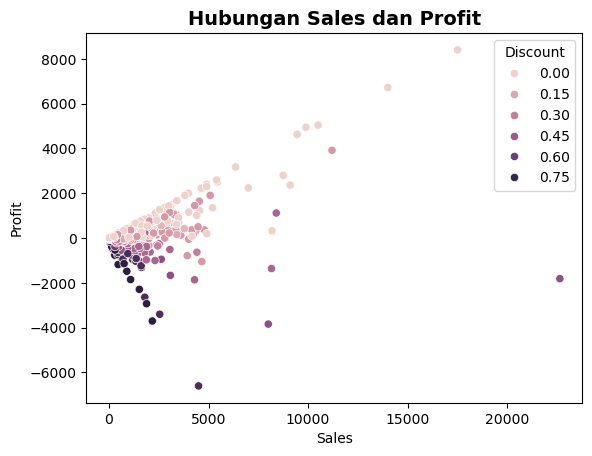

In [38]:
plt.figure(figure=(8,6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Discount') #scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Hubungan Sales dan Profit", fontsize=14, fontweight='bold')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

**Analisa hubungan antara Sales dan Profit:**

- Terlihat bahwa ada hubungan ketiganya, semakin tinggi Sales maka Profit akan semakin tinggi namun discount memiliki peran penting. Semakin tinggi Discount, maka pergerakan profit semakin negatif meskipun transaksi sales besar. 
- Warna terang (diskon 0.0–0.15) Mayoritas titik berada di area profit positif. Transaksi dengan sales besar (>10.000), profit tetap cenderung positif (transaksi tanpa diskon atau diskon kecil sehat secara profit).
- Warna medium (diskon 0.3–0.45) Titik mulai banyak yang masuk ke profit negatif. Makin besar diskon maka profit makin mendekati atau di bawah nol.
- Warna gelap (diskon 0.6–0.75) Hampir semua titik ada di profit negatif. Beberapa transaksi dengan sales besar sekalipun justru menghasilkan kerugian besar (outlier di bawah -6000) (diskon tinggi mengubah transaksi menjadi rugi).

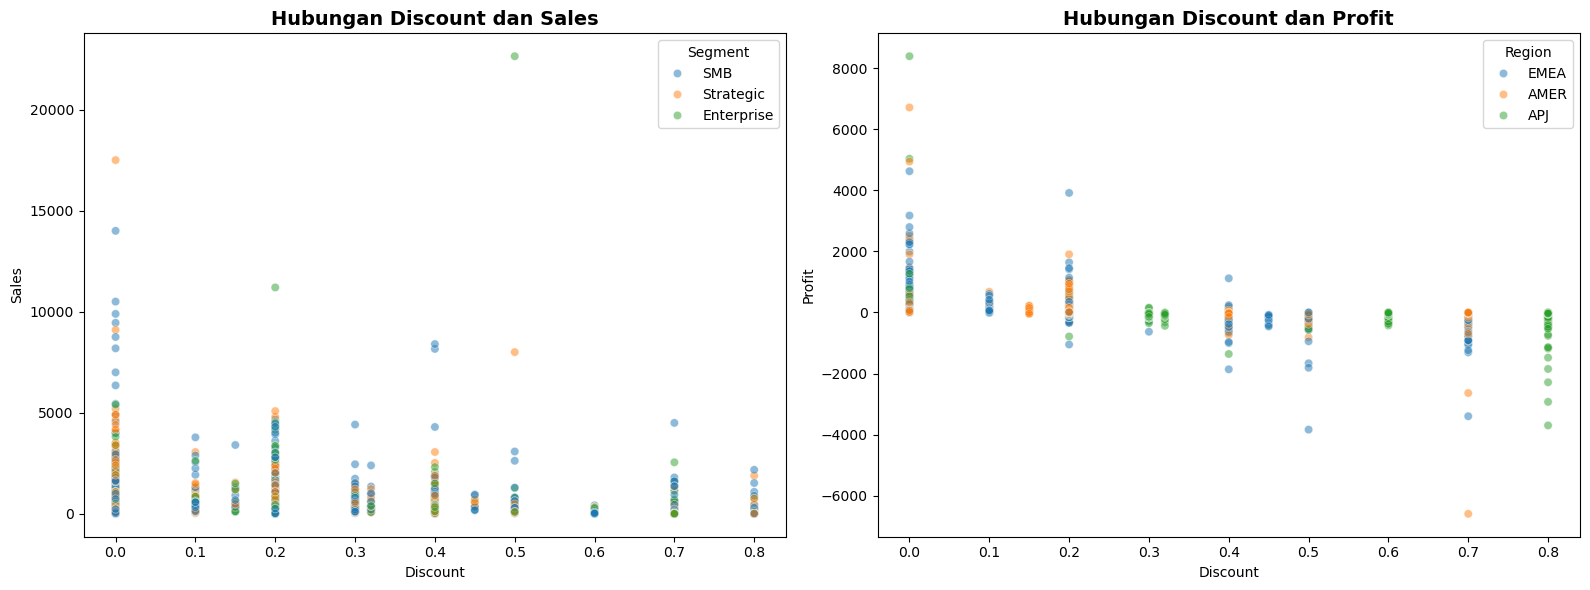

In [39]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.scatterplot(x='Discount', y='Sales', data=df, alpha=0.5, hue='Segment')
plt.title("Hubungan Discount dan Sales", fontsize=14, fontweight='bold')
plt.xlabel("Discount")
plt.ylabel("Sales")


plt.subplot(1,2,2)
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5, hue='Region')
plt.title("Hubungan Discount dan Profit", fontsize=14, fontweight='bold')
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()

**Analisa hubungan antara Discount dan Sales:**

- Pada diskon yang rendah masih ada sales yang terdaftar ini menunjukkan bahwa diskon bukanlah pendorong utama pada peningkatan sales.
- Sales tinggi banyak terjadi pada transaksi dengan diskon rendah atau tanpa diskon.
- Terdapat outlier sales terbesar (di atas 20.000) dari Enterprise dengan diskon sekitar 0.5.
- SMB memiliki banyak titik tersebar, menunjukkan banyak transaksi, meski sales per transaksi lebih kecil.
- Strategic beberapa transaksi dengan sales cukup tinggi, meskipun jumlah titik tidak sebanyak SMB.
- Enterprise lebih jarang, tapi ketika muncul bisa menghasilkan sales yang sangat besar (outlier di 20.000).

**Analisa hubungan antara Discount dan Profit:**

- Semua region memiliki titik profit positif di rentang diskon rendah (0.0-0.2).
- Outlier profit >8000 terjadi di discount 0.0–0.1. Artinya, penjualan tanpa diskon atau discount kecil masih menguntungkan.
- Diskon menengah hingga tinggi (≥0.3) menunjukkan profit bergerak ke arah negatif akibat semakin besarnya discount.
- Terlihat jelas di discount 0.4, 0.6, 0.7, dan 0.8 banyak titik negatif. 
- Distribusi EMEA cukup tersebar, ada kombinasi profit positif dan negatif.
- AMER memiliki outlier negatif paling banyak, bahkan memiliki outlier di diskon tinggi (hingga -6000), menandakan pemberian diskon agresif sangat merugikan profit.
- APJ banyak memiliki titik di diskon tinggi (0.7–0.8) sebagian besar transaksi juga merugi.
- Analisa juga menunjukkan hubungan negatif antara discount dan profit → semakin besar diskon, semakin buruk margin. Diskon besar bukan hanya menekan revenue, tapi juga merusak profitabilitas.

## 3.F. Analisis Trend Sales & Profit

#### 1. Bagaimana perkembangan sales dan profit dari waktu ke waktu?

In [40]:
df['Year'] = df['Order Date'].dt.year

yearly_trend = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
yearly_trend['Year'] = yearly_trend['Year'].astype(int)

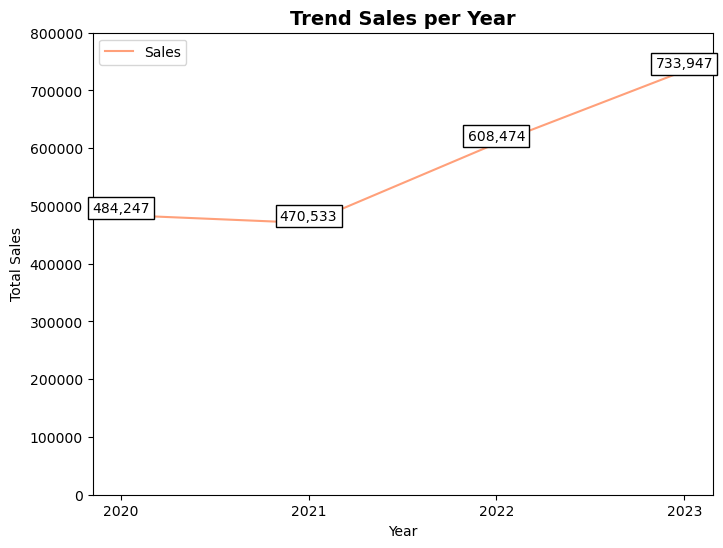

In [41]:
plt.figure(figsize=(8,6))
plt.plot(yearly_trend['Year'], yearly_trend['Sales'], color='lightsalmon', label='Sales')

for x, y in zip(yearly_trend['Year'], yearly_trend['Sales']):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom',
            bbox=dict(boxstyle='square', facecolor='white'))
    
plt.title("Trend Sales per Year", fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.ylim([0, 800000])
plt.xticks(yearly_trend['Year'])
plt.legend()
plt.show()

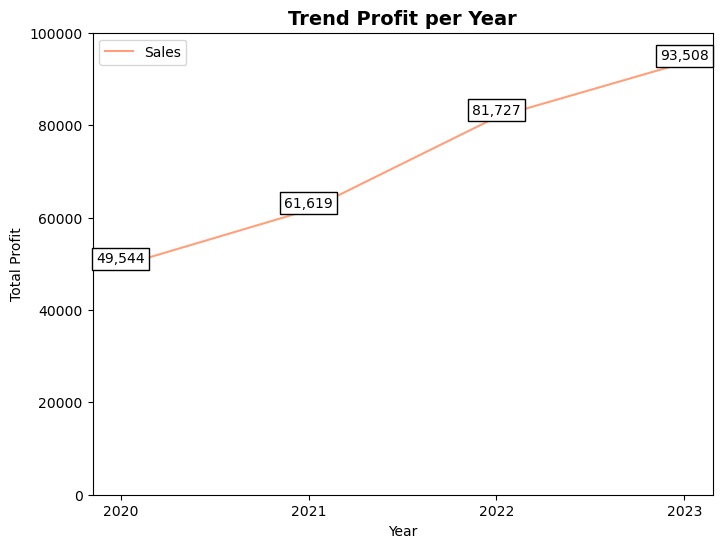

In [42]:
plt.figure(figsize=(8,6))
plt.plot(yearly_trend['Year'], yearly_trend['Profit'], color='lightsalmon', label='Sales')

for x, y in zip(yearly_trend['Year'], yearly_trend['Profit']):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', 
             bbox=dict(boxstyle='square', facecolor='white'))
    
plt.title("Trend Profit per Year", fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.ylim([0, 100000])
plt.xticks(yearly_trend['Year'])
plt.legend()
plt.show()

**Analisa Keseluruhan Trend Sales dan Profit:**

- Naik signifikan dari 484K (2020) menjadi 734K (2023).
- Terjadi lonjakan besar terutama di 2022–2023.
- Sales turun di 2021 kemungkinan besar akibat efek tertunda dari pandemi Covid-19.
    - Tahun 2020 besar kemungkinan lonjakan permintaan (panic buying) karena banyak perusahaan berlomba-lomba untuk mencari solusi SaaS demi mendukung kerja daring para karyawan.
    - Tahun 2021, dengan kondisi ekonomi belum pulih, banyak customer (perusahaan) berusaha untuk menahan belanja atau mengurangi kontrak (berhenti subscription).
- Trend Sales ini menunjukkan bahwa perusahaan tidak agresif dalam diskon strategi sehingga sales tidak terdongkrak, tapi besar kemungkinan perusahaan berusaha untuk menjaga profit agar tetap stabil.
- Terjadi pergeseran ke produk dengan margin lebih tinggi (Alchemy, Data Smasher, OneView, Support) yang menyebabkan profit tetap stabil.

**Trend Profit:**
- 2020 -> 49.5K
- 2021 -> 61.6K (+24.4%)
- 2022 -> 81.7K (+32.6%)
- 2023 -> 93.5K (+14.4%)
- Profit tumbuh lebih cepat dibanding Sales.
- Terjadi perlambatan pertumbuhan pada tahun 2023. Hal ini dapat dipengaruhi oleh faktor eksternal maupun internal. Perlu dikonfirmasi lebih dalam untuk melihat kebijakan perusahaan dalam pengambilan keputusan pada tahun ini.

In [43]:
# Membuat kolom untuk melihat Produk per Year dan melihat pergerakan Sales dan Profit-nya. 
prod_mix = df.groupby(['Product', 'Year'])[['Sales', 'Profit']].sum().reset_index()
prod_mix

,Product,Year,Sales,Profit
0,Alchemy,2020,10849.7820,2912.9433
1,Alchemy,2021,26179.4500,9930.2988
2,Alchemy,2022,49599.4100,17742.7926
3,Alchemy,2023,62899.3880,25031.7902
4,Big Ol Database,2020,62023.3730,369.1689
5,Big Ol Database,2021,27763.6970,2977.4856
6,Big Ol Database,2022,55906.8860,2907.3180
7,Big Ol Database,2023,43544.6750,-2869.2156
8,ChatBot Plugin,2020,6057.9820,1406.8031
9,ChatBot Plugin,2021,6236.8340,1485.0582


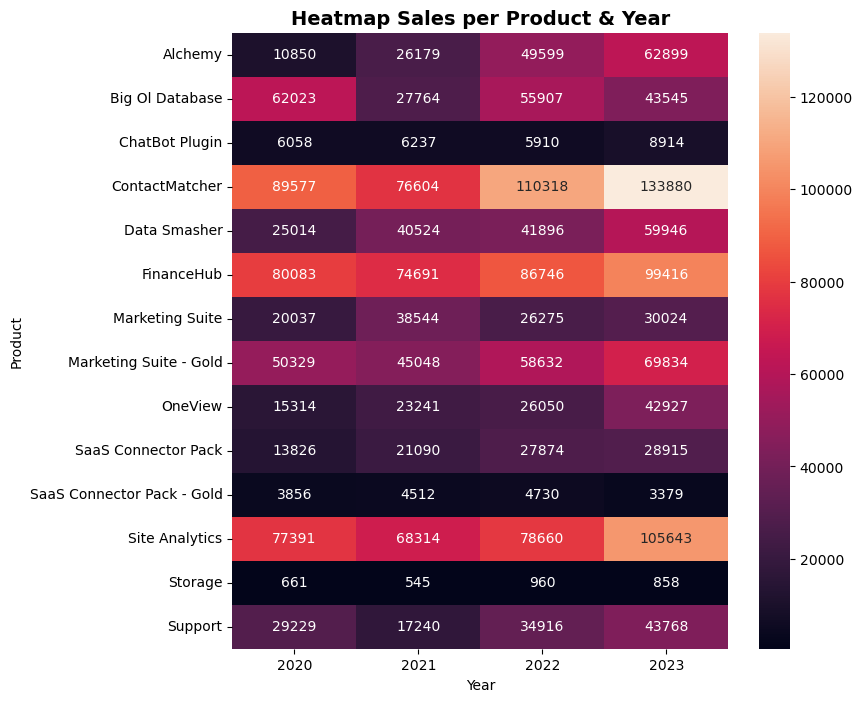

In [44]:
# Visualisasi secara keseluruhan pada Sales per Product dan Year
pivot = prod_mix.pivot(index='Product', columns='Year', values='Sales')

plt.figure(figsize=(8,8))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Heatmap Sales per Product & Year", fontsize=14, weight='bold')
plt.show()

**Analisa Sales per Product & Year:**

- Tahun 2021 terjadi penurunan sales yang dipicu oleh turunnya pembelian pada beberapa produk utama: Big Ol Database, ContactMatcher, FinanceHub, Marketing Suite Gold, Site Analytics, dan Support.
- Tahun 2022 mulai terjadi pemulihan (recovery), terutama berkat peningkatan performa produk ContactMatcher, Alchemy, dan Site Analytics.

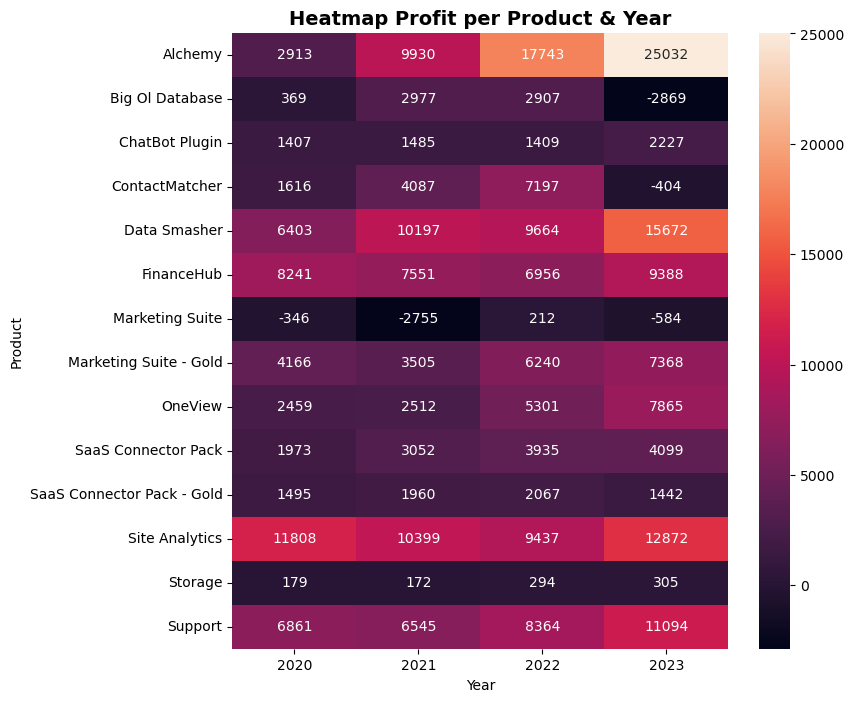

In [45]:
# Visualisasi secara keseluruhan pada Profit per Product dan Year
pivot = prod_mix.pivot(index='Product', columns='Year', values='Profit')

plt.figure(figsize=(8,8))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Heatmap Profit per Product & Year", fontsize=14, weight='bold')
plt.show()

**Analisa Profit per Product & Year:**

- Profit tidak ikut turun di 2021, meskipun sales menurun.
- Hal ini karena profit ditopang oleh produk dengan margin tinggi seperti Alchemy, Data Smasher, OneView, dan Support.
- Artinya, perusahaan berhasil menjaga kinerja profit dengan mengandalkan produk-produk yang lebih menguntungkan.

In [46]:
discount_mean_year_product = df.groupby(['Year','Product'])['Discount'].mean().reset_index()
discount_mean_year_product

,Year,Product,Discount
0,2020,Alchemy,0.220000
1,2020,Big Ol Database,0.326923
2,2020,ChatBot Plugin,0.073171
3,2020,ContactMatcher,0.354432
4,2020,Data Smasher,0.078378
5,2020,FinanceHub,0.134146
6,2020,Marketing Suite,0.205676
7,2020,Marketing Suite - Gold,0.073446
8,2020,OneView,0.164516
9,2020,SaaS Connector Pack,0.150000


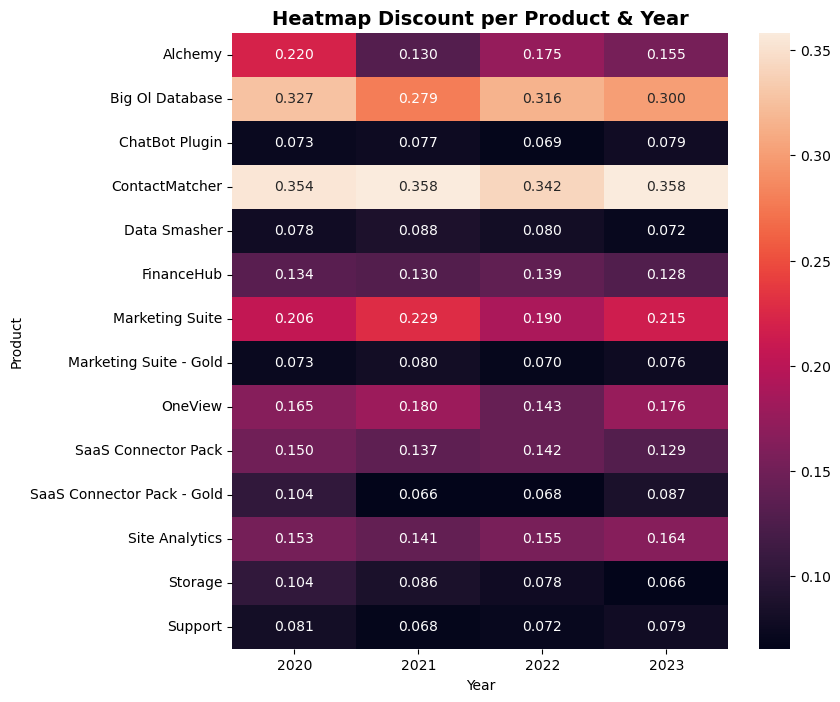

In [47]:
pivot = discount_mean_year_product.pivot(index='Product', columns='Year', values='Discount')

plt.figure(figsize=(8,8))
sns.heatmap(pivot, annot=True, fmt=".3f")
plt.title("Heatmap Discount per Product & Year", fontsize=14, weight='bold')
plt.show()

**Analisa Discount per Product & Year:**

- Beberapa produk memiliki diskon yang relatif stabil dan cukup tinggi seperti ContactMatcher, Big Ol Database, dan Marketing Suite, namun tidak selalu berbanding lurus dengan peningkatan profit.
- Sebaliknya, produk seperti Alchemy, Data Smasher, dan Support menunjukkan bahwa diskon rendah dapat menghasilkan margin tinggi, sehingga lebih berkontribusi terhadap profitabilitas perusahaan.

#### 2. Bagaimana hubungan antara discount dan margin/profitabilitas? 
#### Apakah diskon besar benar-benar mendorong sales atau justru menekan profit?

In [48]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
margin = df.groupby('Year')[['Sales','Profit']].sum()
margin['ProfitMargin'] = margin['Profit'] / margin['Sales']
margin

,Sales,Profit,ProfitMargin
Year,,,
2020,484247.4981,49543.9741,0.102311
2021,470532.5090,61618.6037,0.130955
2022,608473.8300,81726.9308,0.134315
2023,733947.0232,93507.5131,0.127404


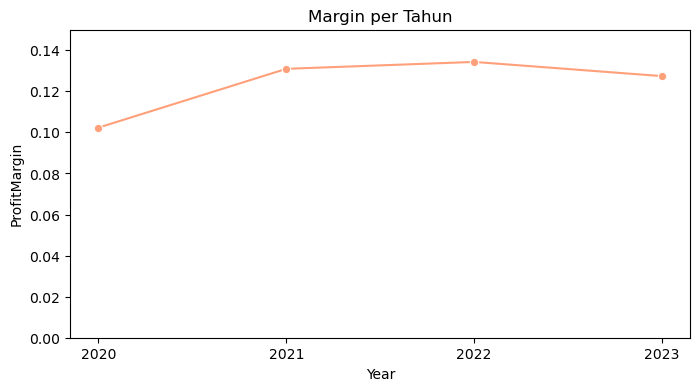

In [49]:
# Visualisasi Hubungan antara Discount dengan Margin
plt.figure(figsize=(8,4))
sns.lineplot(x= 'Year', y= 'ProfitMargin', data=margin, marker='o', color='lightsalmon')
plt.title('Margin per Tahun')
plt.ylim([-0.0,0.15])
plt.xlabel('Year')
plt.ylabel('ProfitMargin')
plt.xticks(yearly_trend['Year'])
plt.show()

In [50]:
discount_year = df.groupby('Year')[['Discount']].mean()
discount_year

,Discount
Year,
2020,0.158284
2021,0.155609
2022,0.154698
2023,0.156499


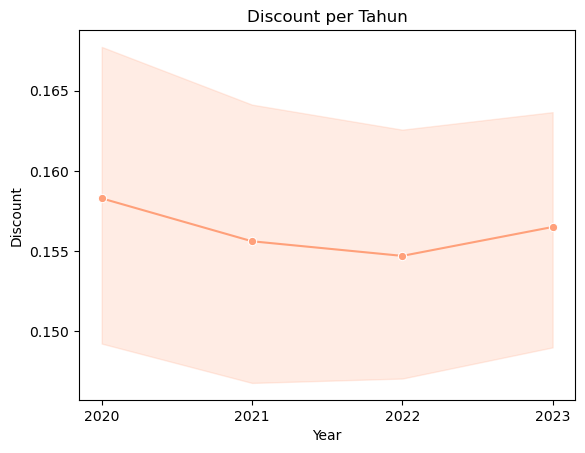

In [51]:
# Visualisasi Hubungan antara Discount dengan Margin
plt.figure(figure=(8,6))
sns.lineplot(x= 'Year', y= 'Discount', data=df, marker='o', color='lightsalmon')

plt.title('Discount per Tahun')
# plt.ylim([0.0,0.17])
plt.xlabel('Year')
plt.ylabel('Discount')
plt.xticks(yearly_trend['Year'])
plt.show()

**Analisis Ringkasan Margin Tahunan (2020-2023):**

Profit Margin (Profit/Sales)
- Margin meningkat dari 10.2% (2020) → puncaknya 13.4% (2022).
- Sedikit turun di 2023 (12.7%), walau profit absolut tetap tertinggi.
- Ada kemungkinan meskipun penjualan naik, ada indikasi biaya/diskon meningkat di 2023 yang menekan margin.

**Analisa Discount per Tahun:**

- Secara keseluruhan discount terlihat stabil di kisaran 15–16%. Tidak ada kenaikan diskon yang signifikan antar tahun.
- Terjadi sedikit penurunan di 2020–2022 (15.8% - 15.6% - 15.5%). Ada kemungkinan perusahaan berusaha untuk sedikit menekan kebijakan diskon.
- Tahun 2023 discount kembali naik tipis 15.6% - 15.65%.
- Meskipun kenaikan kecil, hal ini bisa menjadi salah satu faktor kenapa profit margin turun di 2023.
- Profit mengalami perlambatan pertumbuhan tahun 2023, hal ini juga bisa menjadi salah satu imbas dari peningkatan discount pada tahun 2023.

In [52]:
df['ProfitMargin'] = df['Profit']/df['Sales']

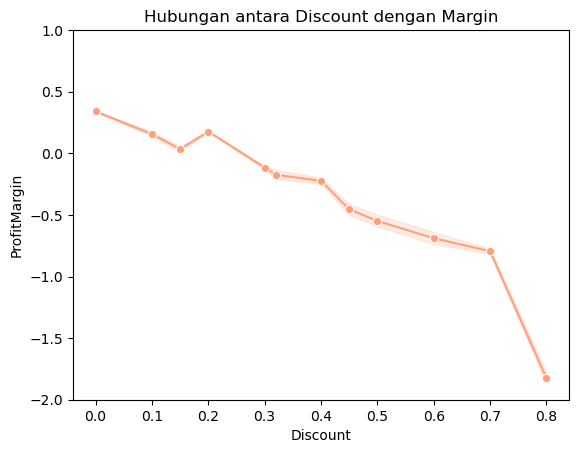

In [53]:
# Visualisasi Hubungan antara Discount dengan Margin
plt.figure(figure=(8,6))
sns.lineplot(x= 'Discount', y= 'ProfitMargin', data=df, marker='o', color='lightsalmon')
plt.title('Hubungan antara Discount dengan Margin')
plt.ylim([-2.0,1.0])
plt.xlabel('Discount')
plt.ylabel('ProfitMargin')
plt.show()

**Analisis Discount dengan Margin:**

- Pada discount rendah 0%–20% terlihat margin positif karena berada di atas nol 
- Pada discount mulai 30% menunjukkan pergerakan margin yang mulai negatif.
- Diskon tinggi 40%–70% menunjukkan margin bergerak semakin negatif, setiap tambahan diskon justru memperbesar kerugian.
- Diskon ekstrem 80% margin drop drastis hampir -2.0. 

In [54]:
# Analisa mendalam untuk kebijakan distribusi Discount oleh perusahaan

In [55]:
# Melihat rata-rata discount berdasarkan product 
df.groupby('Product')['Discount'].mean().sort_values(ascending=False)

Product
ContactMatcher                0.353067
Big Ol Database               0.306087
Marketing Suite               0.211140
OneView                       0.166524
Alchemy                       0.161765
Site Analytics                0.154556
SaaS Connector Pack           0.138349
FinanceHub                    0.132518
Storage                       0.082028
SaaS Connector Pack - Gold    0.080315
Data Smasher                  0.078452
Support                       0.075128
ChatBot Plugin                0.074874
Marketing Suite - Gold        0.074704
Name: Discount, dtype: float64

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/3587734665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Discount', y='Product', palette="rocket")


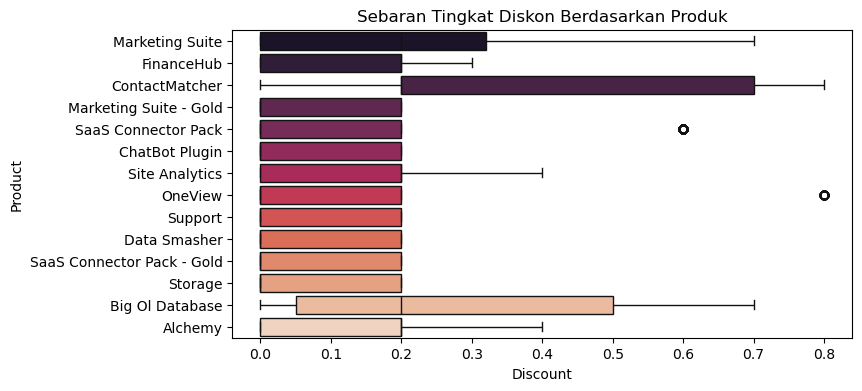

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Discount', y='Product', palette="rocket")
plt.title('Sebaran Tingkat Diskon Berdasarkan Produk')
plt.show()

**Analisa Distribusi Discount per Product:**

Product dengan variasi discount tinggi
- ContactMatcher, Big Ol Database, Marketing Suite - whiskers dan box menunjukkan variasi discount tinggi. 
- Persebaran discount untuk ketiga product tersebut tidak konsisten, kadang kecil, kadang sangat besar.

Produk dengan variasi diskon rendah (relatif stabil)
- SaaS Connector Pack, ChatBot Plugin, OneView, Support, Data Smasher, Storage - menunjukkan ukuran boxplot sempit dan median seragam.
- Hal ini menggambarkan bahwa discount diberikan lebih seragam, cenderung terkendali.

Produk dengan discount ekstrim (outlier)
- Site Analytics memiliki titik outlier di atas 0.7–0.8 (discount 70–80%).
- SaaS Connector Pack memiliki titik outlier di 0.6(discount 60%)

#### 3. Bagaimana pola pemberian discount di berbagai negara dan region?

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/1057702032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_country_discount, y=top10_country_discount.index, palette="rocket")


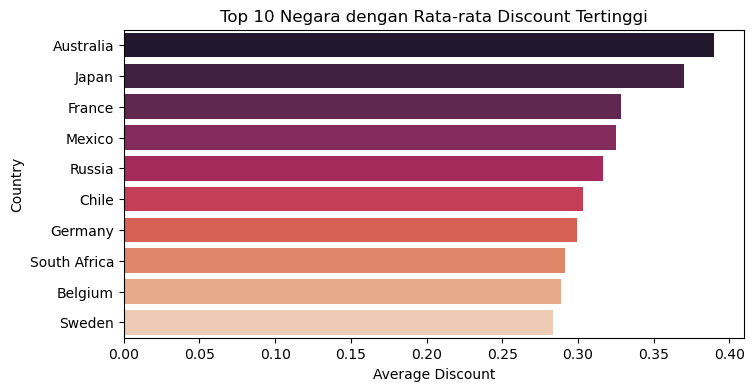

In [57]:
top10_country_discount = (
    df.groupby('Country')['Discount']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(x=top10_country_discount, y=top10_country_discount.index, palette="rocket")
plt.title("Top 10 Negara dengan Rata-rata Discount Tertinggi")
plt.xlabel("Average Discount")
plt.ylabel("Country")
plt.show()

In [58]:
# Melihat distribusi discount berdasarkan Negara per Region
def discount_country_by_region(region_name):
    return (
        df[df['Region'] == region_name]
        .groupby('Country')['Discount']
        .agg(['mean','median', 'max', 'min', 'std','count'])
        .reset_index()
        .sort_values('mean', ascending=False)
    )

In [59]:
# 1. Negara di APJ
apj_discount = discount_country_by_region('APJ')
print("Distribusi Diskon - Region APJ")
apj_discount.head(10)

Distribusi Diskon - Region APJ


,Country,mean,median,max,min,std,count
0,Australia,0.390041,0.2,0.8,0.2,0.245120,492
4,Japan,0.370193,0.2,0.8,0.2,0.243362,985
9,Taiwan,0.085714,0.0,0.2,0.0,0.101419,21
5,New Zealand,0.059459,0.0,0.2,0.0,0.092675,37
8,South Korea,0.015556,0.0,0.3,0.0,0.066766,135
6,Philippines,0.006250,0.0,0.3,0.0,0.043073,96
1,China,0.005714,0.0,0.3,0.0,0.041204,105
2,India,0.000000,0.0,0.0,0.0,0.000000,149
3,Indonesia,0.000000,0.0,0.0,0.0,0.000000,24
7,Singapore,0.000000,0.0,0.0,0.0,0.000000,66


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/1205944794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= apj_discount,


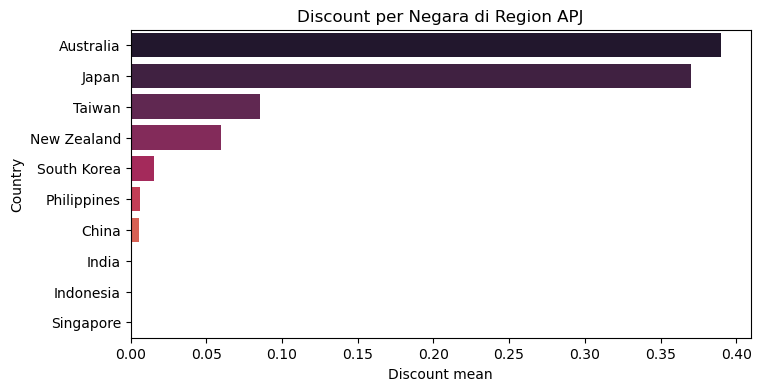

In [60]:
# Figure APJ
plt.figure(figsize=(8,4))
sns.barplot(data= apj_discount,
            x='mean', y='Country', palette="rocket")
plt.title("Discount per Negara di Region APJ")
plt.ylabel("Country")
plt.xlabel("Discount mean")
plt.show()

In [61]:
# 2. Negara di EMEA
emea_discount = discount_country_by_region('EMEA')
print("Distribusi Diskon - Region EMEA")
emea_discount.head(10)

Distribusi Diskon - Region EMEA


,Country,mean,median,max,min,std,count
7,France,0.328620,0.2,0.7,0.2,0.189661,587
20,Russia,0.316484,0.2,0.7,0.2,0.208792,182
8,Germany,0.299347,0.2,0.7,0.2,0.192784,383
23,South Africa,0.291257,0.2,0.7,0.2,0.184956,183
1,Belgium,0.288710,0.2,0.7,0.2,0.185319,124
25,Sweden,0.283534,0.2,0.7,0.2,0.178959,249
22,Slovenia,0.200000,0.2,0.2,0.2,NaN,1
10,Iceland,0.075000,0.0,0.3,0.0,0.150000,4
12,Israel,0.061538,0.0,0.2,0.0,0.093514,39
26,Turkey,0.060377,0.0,0.2,0.0,0.092694,53


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/831746068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= emea_discount,


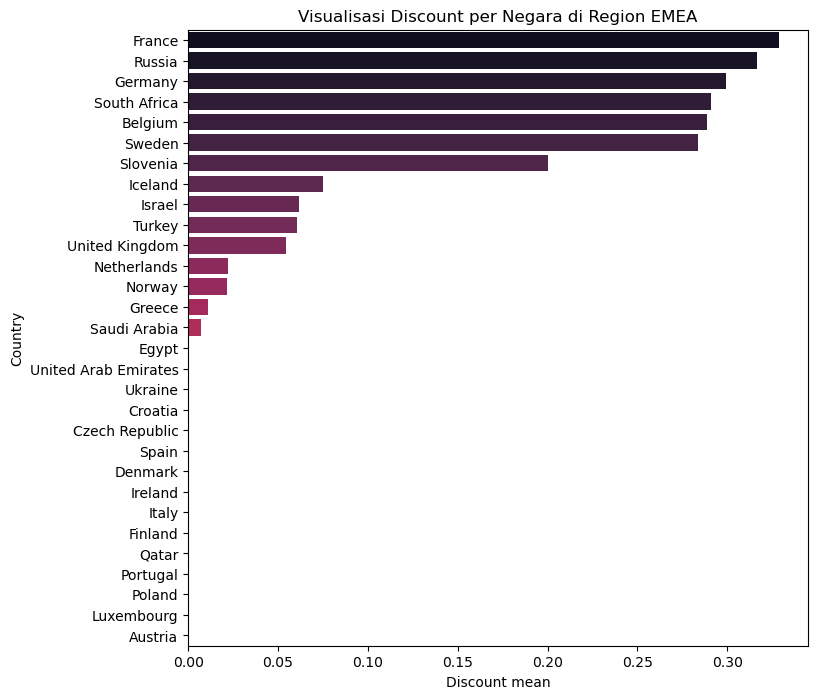

In [62]:
# Figure EMEA
plt.figure(figsize=(8,8))
sns.barplot(data= emea_discount,
            x='mean', y='Country', palette="rocket")
plt.title("Visualisasi Discount per Negara di Region EMEA")
plt.ylabel("Country")
plt.xlabel("Discount mean")
plt.show()

In [63]:
# 2. Negara di AMEA
amer_discount = discount_country_by_region('AMER')
print("Distribusi Diskon - Region AMER")
amer_discount.head(10)

Distribusi Diskon - Region AMER


,Country,mean,median,max,min,std,count
6,Mexico,0.324947,0.2,0.7,0.2,0.188097,469
3,Chile,0.303571,0.2,0.7,0.2,0.197031,224
7,United States,0.072764,0.0,0.2,0.0,0.095225,2001
2,Canada,0.064032,0.0,0.2,0.0,0.093400,506
1,Brazil,0.007059,0.0,0.1,0.0,0.025664,255
0,Argentina,0.004615,0.0,0.3,0.0,0.037066,130
4,Colombia,0.000000,0.0,0.0,0.0,0.000000,42
5,Costa Rica,0.000000,0.0,0.0,0.0,0.000000,38


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/248599925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= amer_discount,


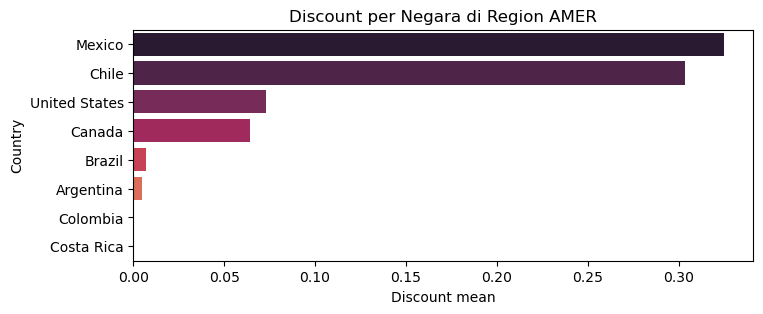

In [64]:
# Figure AMER
plt.figure(figsize=(8,3))
sns.barplot(data= amer_discount,
            x='mean', y='Country', palette="rocket")
plt.title("Discount per Negara di Region AMER")
plt.ylabel("Country")
plt.xlabel("Discount mean")
plt.show()

**Analisa Discount Negara per Region:**

- Australia (mean 0.39) & Jepang (mean 0.37) merupakan negara dengan diskon rata-rata paling tinggi di seluruh dataset.
- Diskon maksimal pada region APJ mencapai 80%, jauh di atas rata-rata global.
- France, Russia, Germany, South Africa, Belgium, Sweden dengan rata-rata diskon tinggi (0.28–0.33), dengan median 0.2 dan maksimum 0.7.
- Mexico (mean 0.32) & Chile (0.30), merupakan negara dengan diskon rata-rata tinggi dan maksimum 0.7 di region AMER.

#### 4. Region mana yang paling berkontribusi terhadap sales dan profit, dan apakah kontribusi itu sustainable?

In [65]:
profit_region = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Profit', ascending=False)

# Membuat kolom ProfitMargin
profit_region['ProfitMargin'] = profit_region['Profit'] / profit_region['Sales']

profit_region

,Region,Sales,Profit,ProfitMargin
2,EMEA,1.043887e+06,147456.0450,0.141257
0,AMER,8.378496e+05,127426.9898,0.152088
1,APJ,4.154642e+05,11513.9869,0.027714


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/541339656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=profit_region, alpha=0.5, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/541339656.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=profit_region, alpha=0.5, color='lightsalmon', palette='rocket')


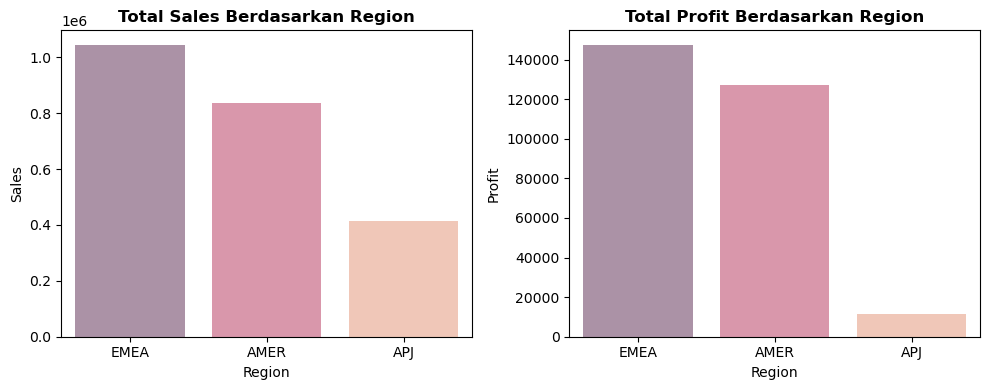

In [66]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.barplot(x='Region', y='Sales', data=profit_region, alpha=0.5, palette='rocket')
plt.title("Total Sales Berdasarkan Region", fontsize=12, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Sales")


plt.subplot(1,2,2)
sns.barplot(x='Region', y='Profit', data=profit_region, alpha=0.5, color='lightsalmon', palette='rocket')
plt.title("Total Profit Berdasarkan Region", fontsize=12, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()

**Analisis Sales dan Profit per Region:**
- EMEA - Sales terbesar (1.04M) sekaligus profit tertinggi (147k). Menjadi region paling menguntungkan.
- AMER - Sales sedang (0.83M), profit cukup tinggi (127k). Kontribusi masih sehat.
- APJ - Sales paling kecil (0.41M) dan profit hanya (11k) menunjukkan kontribusi yang paling lemah (bahkan profit hanya 10% dibandingkan profit AMER dengan jumlah sales 50%nya AMER).

In [67]:
segment_region = df.groupby(['Region','Segment'])[['Sales','Profit']].sum().reset_index()
segment_region['ProfitMargin'] = segment_region['Profit'] / segment_region['Sales']
display(segment_region)

,Region,Segment,Sales,Profit,ProfitMargin
0,AMER,Enterprise,145193.0110,23078.0015,0.158947
1,AMER,SMB,423965.9390,64474.8817,0.152076
2,AMER,Strategic,268690.6545,39874.1066,0.148402
3,APJ,Enterprise,66875.1460,4210.1895,0.062956
4,APJ,SMB,210202.6190,-5314.4283,-0.025282
5,APJ,Strategic,138386.4758,12618.2257,0.091181
6,EMEA,Enterprise,217584.9915,33010.4875,0.151713
7,EMEA,SMB,527232.7870,74958.7558,0.142174
8,EMEA,Strategic,299069.2365,39486.8017,0.132032


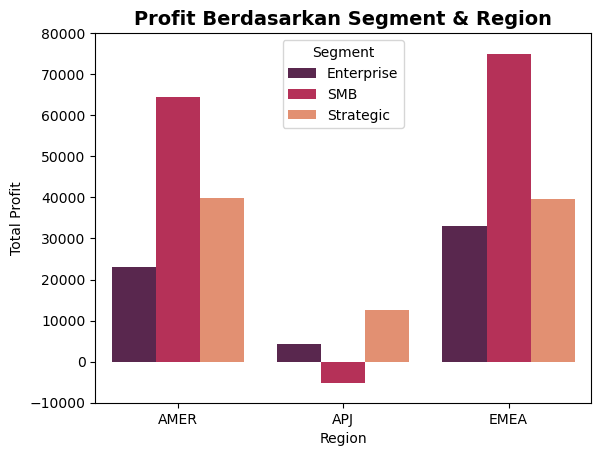

In [68]:
sns.barplot(x='Region', y='Profit', hue='Segment', data=segment_region, palette='rocket')
plt.title("Profit Berdasarkan Segment & Region", fontsize=14, fontweight='bold')
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.ylim(-10000, 80000)
plt.legend(title="Segment")
plt.show()

**Analisa Total Profit berdasarkan Customer Segmentation per Region:**

SMB (Small & Medium Business)
- Menjadi segmen paling menguntungkan di semua region kecuali APJ.
- Di AMER & EMEA, SMB menyumbang profit terbesar (sekitar 65–75k).
- Namun di APJ, SMB justru merugi (profit negatif) merupakan indikasi kuat ada masalah pricing, diskon terlalu tinggi. 

Enterprise
- Profit stabil di semua region, tapi relatif lebih kecil dibanding SMB & Strategic.
- Menariknya, di APJ Enterprise tetap positif walaupun kecil artinya pelanggan Enterprise lebih sustainable meski region ini bermasalah di SMB.

Strategic Segment
- Memberikan kontribusi profit yang cukup kuat di ketiga region.
- Baik di AMER maupun EMEA, Strategic stabil di angka 40k-an.
- Di APJ, Strategic masih positif (~12k) → menandakan segmen ini lebih resilien dibanding SMB.

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2767946561.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=segment_region_sorted, ci=None, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2767946561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=segment_region_sorted, ci=None, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2767946561.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Segment")
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2767946561.py:14: FutureWa

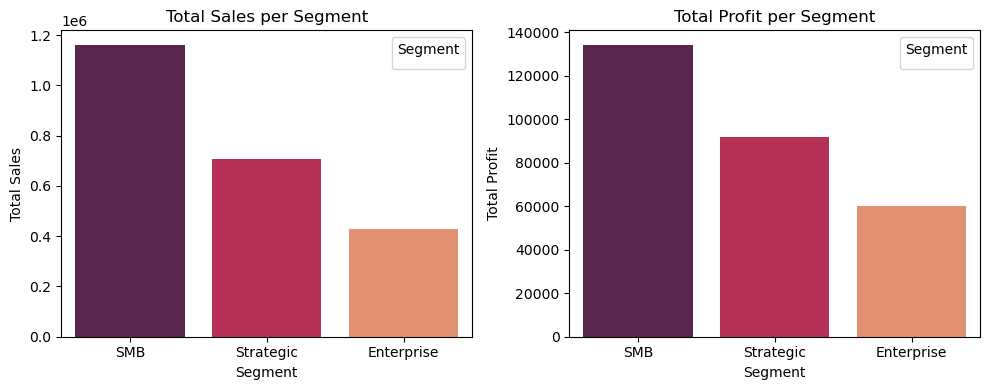

In [69]:
segment_region_sorted = df.groupby(['Segment'])[['Sales','Profit']].sum().reset_index().sort_values(by= 'Sales', ascending=False)
# sales_with_segment = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by= 'Sales', ascending=False)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(x='Segment', y='Sales', data=segment_region_sorted, ci=None, palette='rocket')
plt.title("Total Sales per Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.legend(title="Segment")

plt.subplot(1,2,2)
sns.barplot(x='Segment', y='Profit', data=segment_region_sorted, ci=None, palette='rocket')
plt.title("Total Profit per Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.legend(title="Segment")

plt.tight_layout()
plt.show()

**Analisis Segment berdasarkan Sales dan Profit:**

- Berdasarkan data penjualan SaaS AWS periode 2020–2023, total sales yang tercatat adalah sebesar USD 2,297,200.
- Visualisasi menunjukkan bahwa segmen SMB merupakan penyumbang terbesar, dengan total sales hampir mencapai USD 1.2 juta, juga menjadi kontributor profit terbesar, sekitar 134 ribu.
- Artinya, meski SMB sering dianggap lebih sensitif harga, ternyata segmen ini justru menjadi motor utama pendapatan dan profit perusahaan.
- Berada di posisi kedua, dengan total sales sekitar 700 ribu dan profit sekitar 92 ribu, menunjukkan pelanggan strategic memberikan margin yang lumayan stabil.
- Segmen Enterprise dengan kontribusi sales paling kecil (430 ribu) dan profit juga paling kecil (60 ribu). Walaupun kecil, profit masih positif artinya pelanggan enterprise tetap bernilai, meski skalanya terbatas.

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/3843547717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= profit_country,


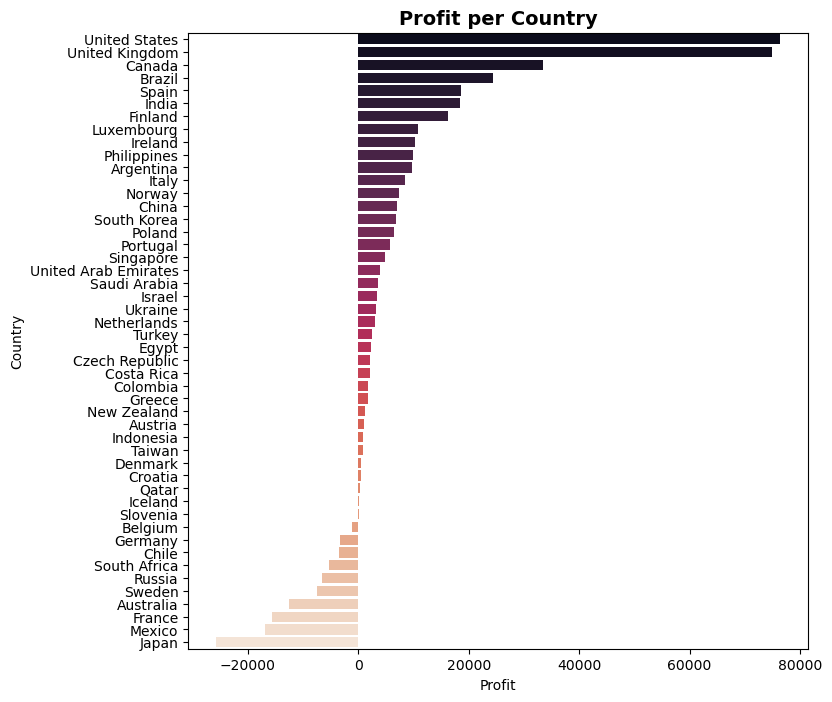

In [70]:
profit_country = df.groupby('Country')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(data= profit_country,
            x='Profit', y='Country', palette="rocket")
plt.title("Profit per Country",fontsize=14, fontweight='bold')
plt.ylabel("Country")
plt.xlabel("Profit")
plt.show()

**Analisa Profit per Country:**

- Negara penyumbang utama profit dari perusahaan adalah United States, United Kingdom dan Canada.
- Negara dengan penyumbang utama profit negatif adalah Japan, Mexico dan Prancis.
- Grafik ini menggambarkan bahwa pendapatan dari perusahaan sangat bergantung dari negara-negara penyumbang profit untuk menutupi kerugian dari penjualan di beberapa negara. 
- Hal ini semakin memperkuat bahwa kemungkinan Region APJ perlu memperbaiki pricing system.

In [71]:
# Menampilkan product paling dominan di APJ
apj_product = df[df['Region']=="APJ"].groupby('Product')[['Sales','Profit']].sum().sort_values('Profit')
apj_product

,Sales,Profit
Product,,
ContactMatcher,62066.9270,-21583.6618
OneView,14421.0340,-5270.8407
SaaS Connector Pack,15353.6100,-3774.0631
Big Ol Database,23917.3690,-2077.9085
Marketing Suite,23925.3868,-1895.6634
Storage,610.9700,170.5581
ChatBot Plugin,5382.1700,1122.5064
FinanceHub,64747.9320,1652.3162
SaaS Connector Pack - Gold,4876.4920,1885.8752


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/955684467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apj_product.reset_index(), x='Profit', y='Product', palette="rocket")
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/955684467.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apj_product.reset_index(), x='Sales', y='Product', palette="rocket")


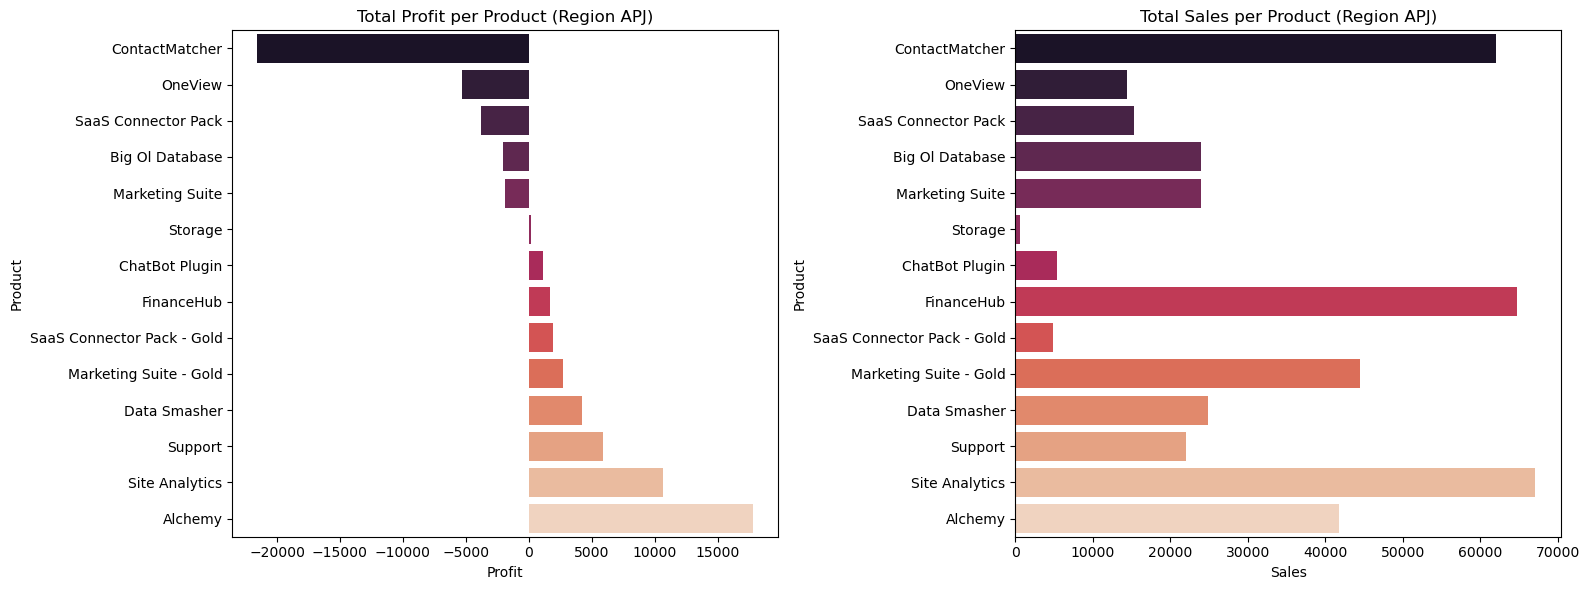

In [72]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.barplot(data=apj_product.reset_index(), x='Profit', y='Product', palette="rocket")
plt.title("Total Profit per Product (Region APJ)")
plt.xlabel("Profit")
plt.ylabel("Product")


plt.subplot(1,2,2)
sns.barplot(data=apj_product.reset_index(), x='Sales', y='Product', palette="rocket")
plt.title("Total Sales per Product (Region APJ)")
plt.xlabel("Sales")
plt.ylabel("Product")

plt.tight_layout()
plt.show()

**Analisa Product Dominan di APJ:**

Produk dengan kontribusi penjualan tinggi tapi merugi:
- ContactMatcher menempati peringkat satu dengan sales terbesar (62K) tetapi juga rugi -21.5K.
- OneView menempati peringkat dua dengan sales 14K tapi rugi -5.2K.
- SaaS Connector Pack menempati sales tertinggi ketiga dengan sales 15K tapi rugi -3.7K.
- Disusul dengan Big Ol Database dan Marketing Suite dengan penjualan moderat (23K–24K) tapi tetap negatif profit.

**Hal ini dapat menjadi indikasi kuat pricing bermasalah atau terlalu banyak diskon.**

- Alchemy memiliki sales terendah 41K namun memiliki profit besar 17.8K. Dapat dipastikan Alchemy merupakan produk unggulan APJ.
- Site Analytics sales kedua terendah 67K dengan profit 10.6K.

In [73]:
# Membuat tabel sales untuk Japan
sales_japan = df[df['Country'] == 'Japan']
sales_japan_product = sales_japan.groupby('Product')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

sales_japan_product

,Sales,Profit
Product,,
Site Analytics,28589.5680,3222.4608
Alchemy,5639.8720,1629.9615
Support,11500.2160,1585.6908
Data Smasher,11328.5600,1105.8501
SaaS Connector Pack - Gold,2530.6480,848.1760
ChatBot Plugin,2369.5280,316.3538
Storage,332.4640,80.7357
Marketing Suite - Gold,15723.5840,-763.7054
FinanceHub,27156.0480,-2315.2470


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/1173921950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Product', palette="rocket", data=sales_japan_product)


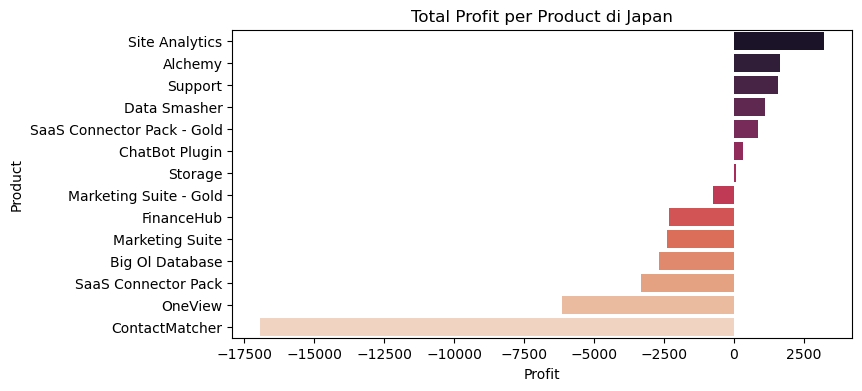

In [74]:
plt.figure(figsize=(8,4))
sns.barplot(x='Profit', y='Product', palette="rocket", data=sales_japan_product)
plt.title("Total Profit per Product di Japan")
plt.xlabel("Profit")
plt.ylabel("Product")
plt.show()

**Analisa Profit per Product (Japan):**

- Product dengan profit positif hanya Site Analytics, Alchemy, Support, Data Smasher, SaaS Connector Pack-Gold, Chat Plugin dan Storage.
- Tujuh dari product yang terjual di Jepang mengalami kerugian khususnya bagi product ContactMatcher. 
- Sistem pricing di Jepang tampaknya tidak sustainable karena diskon tinggi + margin tipis.

#### 5. Bagaimana dengan sistem pricing produk AWS?

In [75]:
df['PricePerUnit'] = df['Sales']/df['Quantity']
df.groupby('Region')[['PricePerUnit']].median()

,PricePerUnit
Region,
AMER,18.700
APJ,13.094
EMEA,16.240


In [76]:
df.groupby('Country')['PricePerUnit'].median().sort_values(ascending=False).tail(10)

Country
Germany         12.536
New Zealand     12.440
Australia       11.756
Costa Rica      11.140
South Africa    10.984
Japan           10.392
Netherlands      9.680
Croatia          8.550
Austria          7.130
Qatar            5.180
Name: PricePerUnit, dtype: float64

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2965957855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= ppp_region,
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2965957855.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= ppp_country,


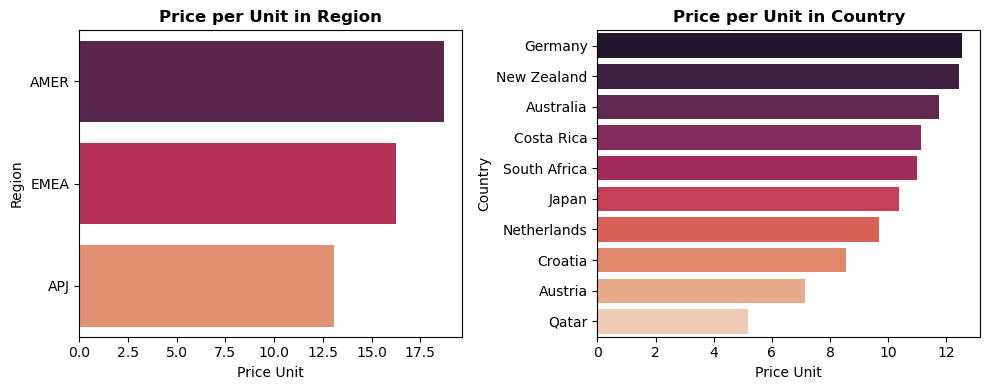

In [77]:
ppp_country = df.groupby('Country')['PricePerUnit'].median().reset_index().sort_values(by='PricePerUnit', ascending=False).tail(10)
ppp_region = df.groupby('Region')['PricePerUnit'].median().reset_index().sort_values(by='PricePerUnit', ascending=False)

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.barplot(data= ppp_region,
            x='PricePerUnit', y='Region', palette="rocket")
plt.title("Price per Unit in Region", fontsize=12, fontweight='bold')
plt.ylabel("Region")
plt.xlabel("Price Unit")

plt.subplot(1,2,2)
sns.barplot(data= ppp_country,
            x='PricePerUnit', y='Country', palette="rocket")
plt.title("Price per Unit in Country", fontsize=12, fontweight='bold')
plt.ylabel("Country")
plt.xlabel("Price Unit")


plt.tight_layout()
plt.show()

**Analisa Pricing per Region:**

- Data PricePerUnit membuktikan bahwa harga per unit di Region APJ lebih murah dibanding region lain.
- Dikombinasikan dengan profit rendah & distribusi diskon besar (Australia & Jepang memiliki diskon 0.37–0.39, tertinggi antar negara), bisa dikatakan strategi pricing di APJ memang patut dievaluasi.
- Perbaikannya tidak cukup hanya menaikkan harga sehingga perlu cek struktur biaya, strategi diskon, dan produk dominan di APJ.

**Analisa Pricing per Country:**

- Australia (11.756) dan Jepang (10.392) termasuk ke dalam 10 negara dengan harga per unit terendah.
- Kedua negara ini juga memiliki rata-rata diskonnya paling tinggi (hingga 0.37–0.39).



## 3.G. Analisis Top Product 

#### Analisa top Product dan Industry berdasarkan Sales dan Profit

In [78]:
industry_product_sales = (
    df.groupby(['Industry', 'Product'])[['Sales', 'Profit']]
               .sum()
               .reset_index()
)

industry_product_sales = industry_product_sales.sort_values(
    ['Industry', 'Sales'], ascending = [True, False]
)

top_product_per_industry = (
    industry_product_sales.groupby('Industry')
    .head(1)
    .reset_index(drop=True)
)

top_product_per_industry



,Industry,Product,Sales,Profit
0,Communications,ContactMatcher,27642.3535,817.7196
1,Consumer Products,FinanceHub,40359.5080,3678.0196
2,Energy,ContactMatcher,60726.8295,9525.2607
3,Finance,ContactMatcher,90040.4280,-5585.6168
4,Healthcare,FinanceHub,46279.4970,3538.2047
5,Manufacturing,ContactMatcher,66695.0160,506.7112
6,Misc,Alchemy,6749.8840,3116.9468
7,Retail,Site Analytics,31782.1360,6154.8749
8,Tech,ContactMatcher,53833.6275,-914.1536
9,Transportation,FinanceHub,16045.8560,1391.0508


Berdasarkan tabel di atas jika diurutkan dengan penyumbang profit berdasarkan Industry, Energy menyumbangkan profit paling tinggi 9525.26 dengan jumlah sales 60726.83



#### Top Industry

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2716269359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Sales', y= 'Industry', data=top_product_per_industry, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2716269359.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Profit', y= 'Industry', data=top_product_per_industry, palette='rocket')


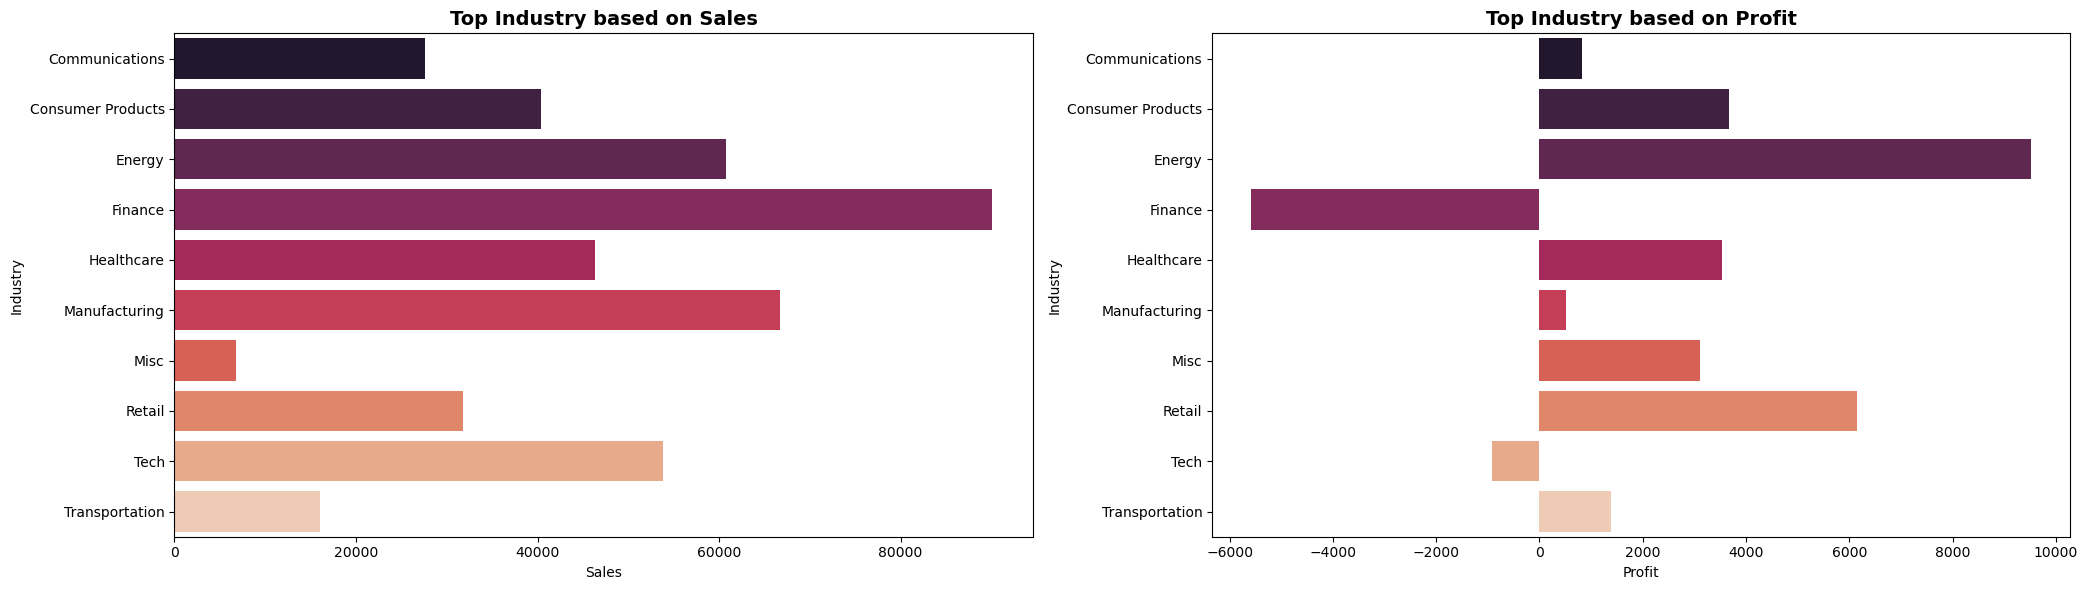

In [79]:
plt.figure(figsize=(21, 6))

plt.subplot(1,2,1)
sns.barplot(x= 'Sales', y= 'Industry', data=top_product_per_industry, palette='rocket')
plt.title('Top Industry based on Sales', fontsize=14, weight='bold')
plt.xlabel('Sales')
plt.ylabel('Industry')


plt.subplot(1,2,2)
sns.barplot(x= 'Profit', y= 'Industry', data=top_product_per_industry, palette='rocket')
plt.title('Top Industry based on Profit', fontsize=14, weight='bold')
plt.xlabel('Profit')
plt.ylabel('Industry')

plt.tight_layout()
plt.show()


**Analisa Top Industry:**

- Industry dengan Sales tertinggi adalah Finance dan Manufacturing, terutama dari penggunaan produk ContactMatcher.
- Namun, Finance justru mencatat Profit terendah (negatif) meskipun penjualannya tinggi.
- Industry dengan Profit tertinggi adalah Energy (didominasi produk ContactMatcher) dan Retail (didominasi produk Site Analytics).
- Temuan ini menegaskan bahwa tingginya Sales tidak menjamin Profit. Faktor seperti tingkat discount atau struktur biaya kemungkinan besar berperan dalam perbedaan hasil tersebut.


Insight:
- Perusahaan perlu mengevaluasi strategi pricing dan discount khususnya di Finance, karena meski volumenya besar, kontribusi profit justru negatif.
- Fokus dapat diarahkan pada Industry Energy dan Retail yang terbukti memberikan margin lebih sehat.

#### Top Product

In [80]:
top_product = df.groupby(['Product'])[['Sales','Profit', 'Discount']].sum().reset_index()
# top_product_by_sales = top_product.sort_values(by='Sales', ascending=False).head(10)
# top_product_by_profit= to_product.sort_values(by='Profit', ascending=False).head(10)
top_product.sort_values(by='Product', ascending=True)

,Product,Sales,Profit,Discount
0,Alchemy,149528.0300,55617.8249,11.00
1,Big Ol Database,189238.6310,3384.7569,35.20
2,ChatBot Plugin,27118.7920,6527.7870,59.60
3,ContactMatcher,410378.2650,12496.2822,650.35
4,Data Smasher,167380.3180,41936.6357,60.80
5,FinanceHub,340935.4150,32136.4203,130.00
6,Marketing Suite,114879.9963,-3472.5560,48.14
7,Marketing Suite - Gold,223843.6080,21278.8264,63.20
8,OneView,107532.1610,18138.0054,77.60
9,SaaS Connector Pack,91705.1640,13059.1436,132.40


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/3684822572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Sales', y= 'Product', data=top_product, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/3684822572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Profit', y= 'Product', data=top_product, palette='rocket')


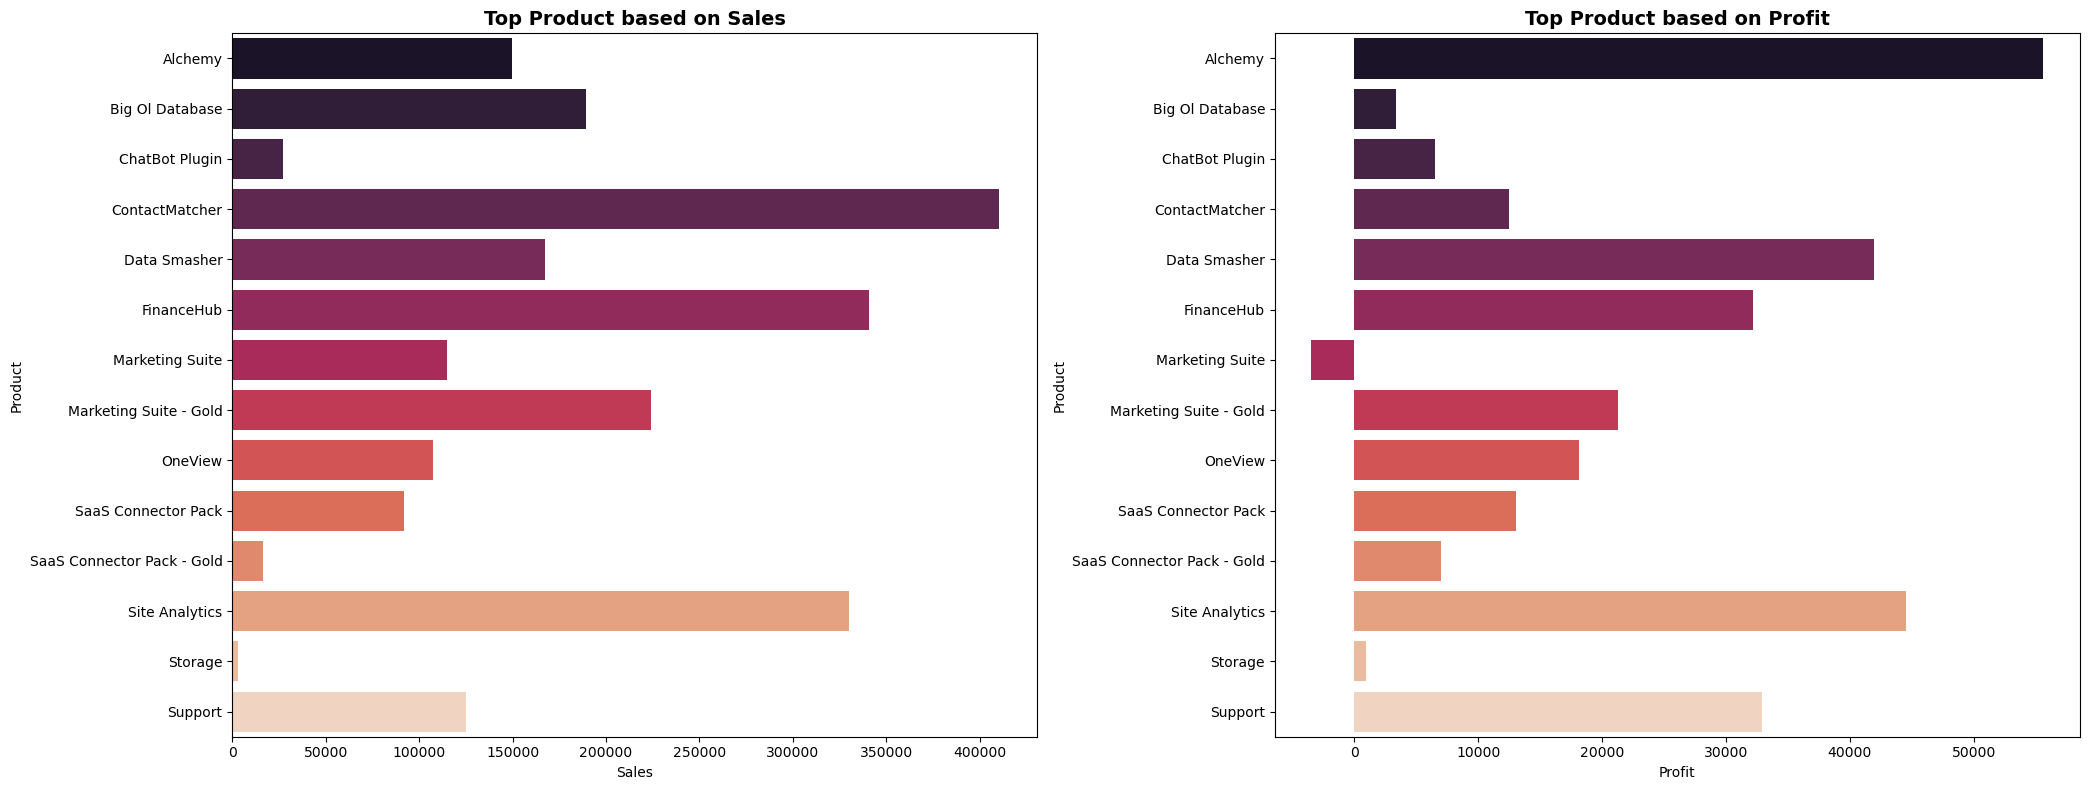

In [81]:
plt.figure(figsize=(21, 8))

plt.subplot(1, 2, 1)
sns.barplot(x= 'Sales', y= 'Product', data=top_product, palette='rocket')
plt.title('Top Product based on Sales', fontsize=14, weight='bold')
plt.xlabel('Sales')
plt.ylabel('Product')

plt.subplot(1, 2, 2)
sns.barplot(x= 'Profit', y= 'Product', data=top_product, palette='rocket')
plt.title('Top Product based on Profit', fontsize=14, weight='bold')
plt.xlabel('Profit')
plt.ylabel('Product')

plt.tight_layout()
plt.show()


**Analisa Top Product:**

- Sales tertinggi berasal dari produk ContactMatcher, FinanceHub, dan Site Analytics.
- Namun, Alchemy justru mencatat Profit tertinggi, meski penjualannya kurang dari setengah ContactMatcher.
- Penopang utama profit perusahaan saat ini adalah Alchemy, Data Smasher, dan Site Analytics.

Insight:
- Perusahaan perlu mengevaluasi strategi pricing dan discount pada Marketing Suite, karena kontribusi profitnya konsisten negatif.
- Fokus pengembangan sebaiknya diarahkan ke Alchemy, Data Smasher, dan Site Analytics, yang terbukti memberikan margin sehat dan berpotensi menjaga keberlanjutan profit perusahaan.

In [82]:
mean_product = df.groupby('Product')[['Sales', 'Profit', 'Discount']].mean().sort_values(by= 'Discount', ascending=False)
mean_product

,Sales,Profit,Discount
Product,,,
ContactMatcher,222.789503,6.784084,0.353067
Big Ol Database,1645.553313,29.432669,0.306087
Marketing Suite,503.859633,-15.230509,0.211140
OneView,230.755710,38.922758,0.166524
Alchemy,2198.941618,817.909190,0.161765
Site Analytics,371.211534,50.073938,0.154556
SaaS Connector Pack,95.825668,13.645918,0.138349
FinanceHub,347.538649,32.758838,0.132518
Storage,13.936774,4.375660,0.082028


/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2225632346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Discount', y= 'Product', data=mean_product, palette='rocket')
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2225632346.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Profit', y= 'Product', data=mean_product, palette='rocket')


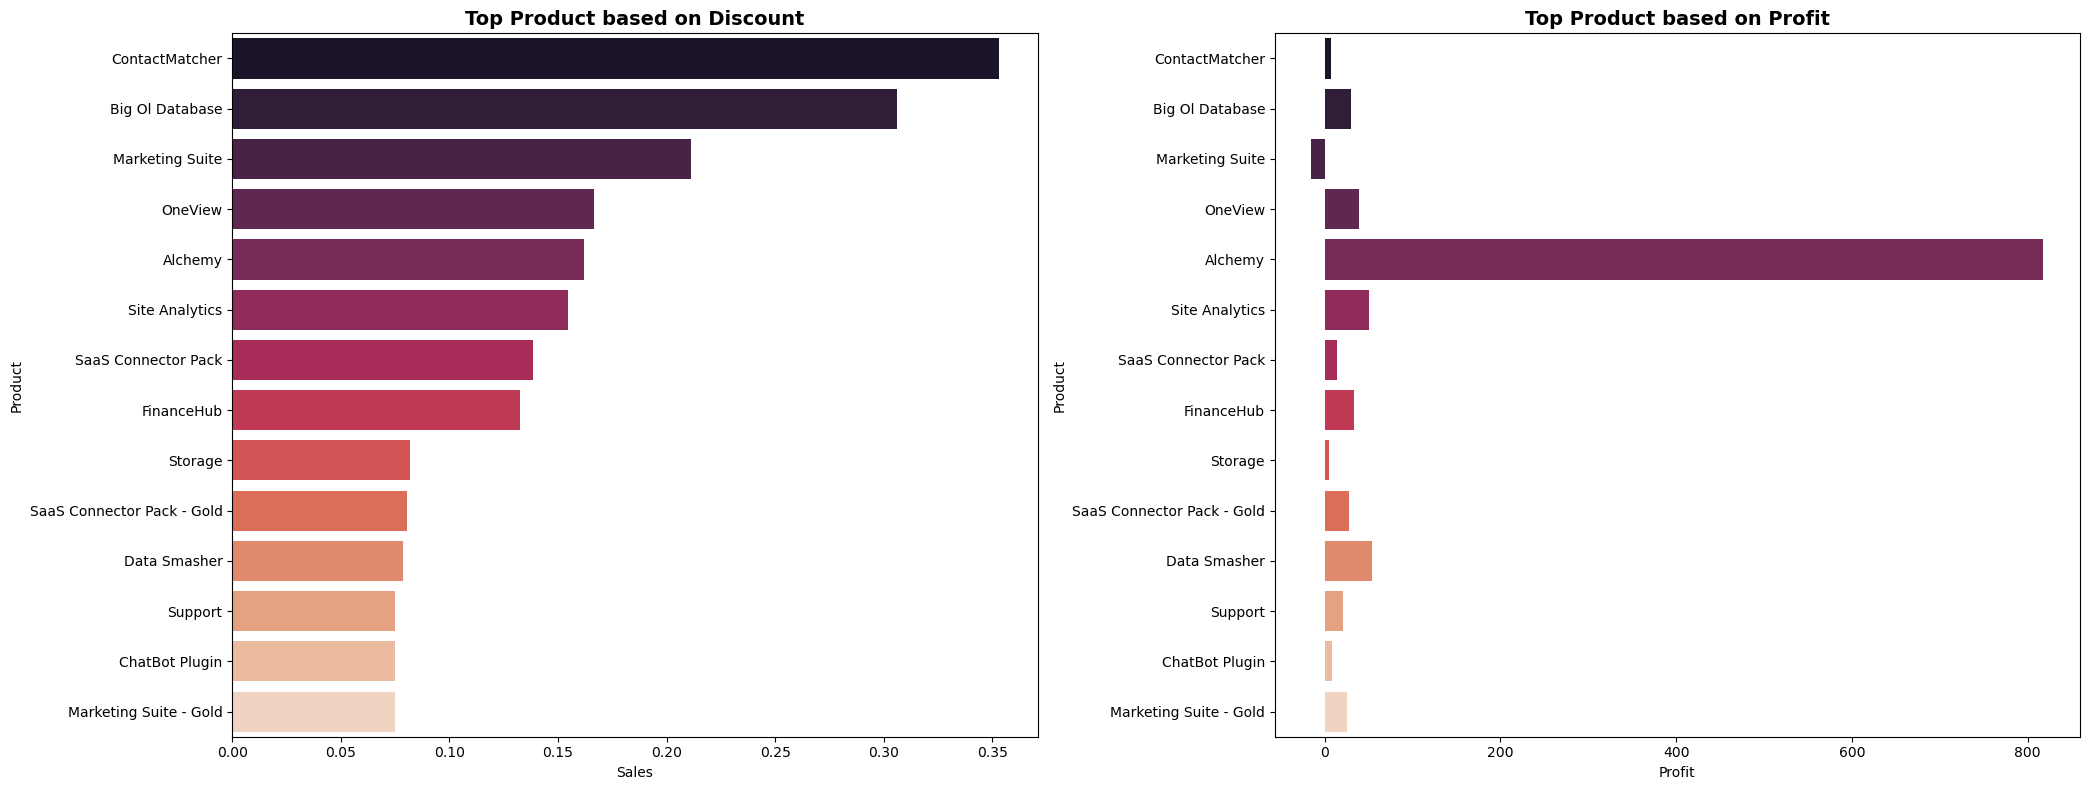

In [83]:
plt.figure(figsize=(21, 8))

plt.subplot(1, 2, 1)
sns.barplot(x= 'Discount', y= 'Product', data=mean_product, palette='rocket')
plt.title('Top Product based on Discount', fontsize=14, weight='bold')
plt.xlabel('Sales')
plt.ylabel('Product')

plt.subplot(1, 2, 2)
sns.barplot(x= 'Profit', y= 'Product', data=mean_product, palette='rocket')
plt.title('Top Product based on Profit', fontsize=14, weight='bold')
plt.xlabel('Profit')
plt.ylabel('Product')

plt.tight_layout()
plt.show()


#### Top Customer

/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2927699218.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Sales', y= 'Customer', palette='rocket', data=top10_sales)
/var/folders/g0/dtv8y1y97n790cf5ty5m4f7m0000gn/T/ipykernel_19401/2927699218.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Profit', y= 'Customer', palette='rocket', data=top10_profit)


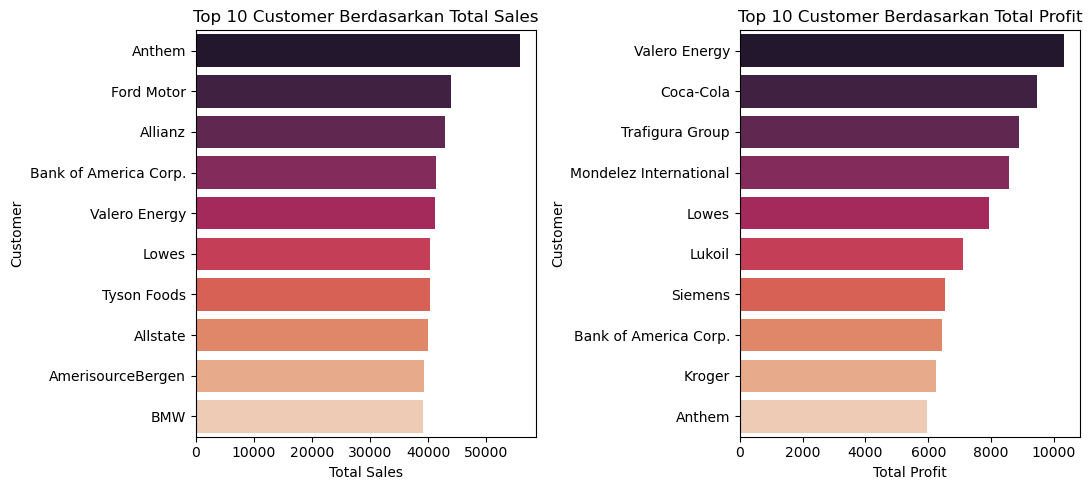

In [84]:
top10_sales = (
    df.groupby('Customer')[['Sales']]
      .sum()
      .reset_index()
      .sort_values(by='Sales', ascending=False)
      .head(10)
)

top10_profit = (
    df.groupby('Customer')['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
    .head(10)
)
# Visualisasi top10_sales 
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.barplot(x= 'Sales', y= 'Customer', palette='rocket', data=top10_sales)
plt.title("Top 10 Customer Berdasarkan Total Sales")
plt.ylabel("Customer")
plt.xlabel("Total Sales")

plt.subplot(1,2,2)
sns.barplot(x= 'Profit', y= 'Customer', palette='rocket', data=top10_profit)
plt.title("Top 10 Customer Berdasarkan Total Profit")
plt.ylabel("Customer")
plt.xlabel("Total Profit")

plt.tight_layout()
plt.show()

**Analisa Top Customer:**

- Tidak semua pelanggan dengan sales yang besar akan memberikan keuntungan yang besar juga.
- Valero Energy adalah contoh ideal pelanggan strategis karena memberikan sales cukup tinggi dan juga profit tertinggi.
- Ada pelanggan besar (Anthem, Ford, Allianz) yang memiliki sales dengan jumlah yang besar. 
- Sebaliknya, pelanggan seperti Valero Energy, Coca-Cola, Traffigura Group memberikan profit yang besar.

#### Churn Rate

In [85]:
# Hitung unique customer tiap bulan
customer_per_year = df.groupby('Year')['Customer ID'].nunique().reset_index()
customer_per_year.rename(columns={'Customer ID': 'Active Customer'}, inplace=True)

# Cari churn dengan membandingkan customer pertahun
customer_per_year['Prev Customer'] = customer_per_year['Active Customer'].shift(1)
customer_per_year['Churned'] = customer_per_year['Prev Customer'] - customer_per_year['Active Customer']

# Hitung churn rate
customer_per_year['Churn Rate'] = (customer_per_year['Churned'] / customer_per_year['Prev Customer']) * 100

customer_per_year

,Year,Active Customer,Prev Customer,Churned,Churn Rate
0,2020,99,NaN,NaN,NaN
1,2021,99,99.0,0.0,0.0
2,2022,99,99.0,0.0,0.0
3,2023,99,99.0,0.0,0.0


# 4. Conclusion and Recommendation

## 4.A. Conclusion

1. Bagaimana perkembangan penjualan (Sales) dan profit dari waktu ke waktu?

- **Trend Sales**: Terjadi penurunan sales akibat dari efek tertunda dari Covid-19. Penjualan tahun 2020 ada lonjakan penjualan akibat perusahaan berlomba-lomba untuk mencari solusi SaaS untuk fasilitas work from home. Sales kembali meningkat tahun 2022-2023 meskipun perusahaan tidak melakukan strategi discount secara agresif. 

- **Trend Profit**: Profit selalu tumbuh sejak 2020-2023. Ini menunjukkan adanya keberhasilan perusahaan untuk tidak melakukan strategi discount secara agresif demi meningkatkan profit. Meskipun tampak adanya perlambatan pertumbuhan pada tahun 2023.

- **Trend Margin**: Sejak 2020-2022 margin terus meningkat, namun pada tahun 2023 terjadi penurunan. Hal ini dapat terjadi kemungkinan akibat dari penurunan pertumbuhan profit yang lebih rendah dengan pertumbuhan sales. 

2. Bagaimana hubungan antara diskon (discount) dan margin/profitabilitas? Apakah diskon besar benar-benar mendorong sales atau justru menekan profit?
   
- **Hubungan Discount dan Margin**: Perusahaan memiliki range discount 0-80%. Dengan hasil pengamatan, perlu adanya pembatasan diskon pada range 30-40%. Hal ini disebabkan perusahaan mendapatkan transaksi yang merugi jika diatas range 30-40%.
- **Hubungan Discount dengan Sales dan Profit**: Berdasarkan analisa dengan menggunakan hubungan discount dengan sales, terlihat bahwa discount tidak serta merta meningkatkan sales. Diskon besar bukan hanya menekan revenue, tapi juga merusak profitabilitas.

3. Bagaimana pola pemberian discount di berbagai negara dan region?

- Negara **Jepang dan Australia** yang berlokasi pada region **APJ** menempati posisi paling agresif dengan rata-rata dan maksimum diskon 0.39 dan 0.37. Hal ini dapat mengindikasikan kedua negara tersebut memiliki kompetisi ketat atau bergantung pada diskon untuk mendorong sales. Jepang bahkan menjadi negara yang paling banyak memberikan profit negatif pada perusahaan. 
- Negara **France dan Russia** yang berlokasi **EMEA** menempati posisi menengah dengan rata-rata 0.33 dan 0.32. Namun, discount maksimal yang terdapat pada region ini tergolong tinggi yaitu 70%. 
- **AMER** menunjukkan pola campuran: Beberapa negara-negara menjadi penunjang profit karena lebih stabil, sementara Latin America lebih agresif dalam diskon.

4. Region dan Segment mana yang paling berkontribusi terhadap sales dan profit, dan apakah kontribusi itu sustainable?
- **SMB** adalah core market baik dari sisi sales maupun profit karena strategi penetrasi harga & retensi pelanggan SMB sangat penting. Sustainability juga relatif stabil. 
- **Strategic Segment** bisa jadi target berikutnya karena profitabilitasnya sehat meskipun sales tidak sebesar SMB. Sustainability tinggi karena margin sehat, bisa jadi growth engine jangka menengah.
- **Enterprise** memiliki tingkat sustainable yang rendah sehingga perlu dievaluasi. Hal ini dilakukan untuk mengevaluasi sehingga bisa lebih menguntungkan.
- **AMER & EMEA** memiliki kontribusi terbesar untuk profit, relatif stabil dan sustainable.
- **APJ** meskipun terdapat transaksi yang besar pada region ini, median profit tetap rendah dengan variabilitas tinggi. Hal ini menunjukkan bahwa region ini tidak sustainable jika pola diskon agresif terus dibiarkan.
- **APJ Khususnya Japan** memiliki banyak kerugian pada penjualan productnya. ContactMatcher bahkan memiliki kerugian hingga mencapai 16.9K. 

5. Bagaimana dengan sistem pricing produk AWS?
- Produk AWS sangat bergantung pada beberapa negara utama seperti US, UK dan Canada yang memberikan profit paling banyak secara global. Namun negara seperti Jepang, Prancis dan Australia memberikan profit negative dan menunjukkan adanya ketidakseimbangan pricing strategy antar negara.
- Untuk price per unit berdasarkan region, APJ perlu melakukan strategi pricing yang baru untuk meningkatkan margin. Discount 80% sangat menggerus margin. Beberapa product dominan di APJ (ContactMatcher, OneView, Marketing Suite, Big OL Database) juga tercatat sebagai pengkontribusi rugi yang signifikan pada total profit.
- Strategi yang diaplikasikan di APJ tidak efektif karena sales tidak meningkat secara signifikan. Bahkan dengan produk dengan penjualan yang tinggi belum tentu memberikan profit yang tinggi bahkan cenderung negatif khusus pada product seperti ContactMatcher & Big OL Database di APJ.

## 4.B. Recommendation

1. Bagaimana perkembangan penjualan (Sales) dan profit dari waktu ke waktu?

- Bisnis SaaS ini sehat dan profitabel, berhasil keluar dari tekanan pandemi dengan strategi produk margin tinggi, namun perlu strategi baru agar pertumbuhan tidak melambat di tahun-tahun berikutnya.

2. Bagaimana hubungan antara diskon (discount) dan margin/profitabilitas? Apakah diskon besar benar-benar mendorong sales atau justru menekan profit?
- Perusahaan bisa mempertimbangkan alternatif selain diskon dengan bundling, loyalty program, atau value-added service untuk menarik customer tanpa mengorbankan margin.

3. Bagaimana pola pemberian discount di berbagai negara dan region?
- Perlu adanya evaluasi ulang dengan strategi discount di region APJ. Jika tidak, profit akan terus menerus tergerus oleh discount tinggi yang tidak berkesudahan. Perusahaan juga bisa melakukan segmentasi customer dengan cara memberikan discount berdasarkan price sensitivity customer dengan strategi menarik volume dengan tujuan penetrasi awal.
- Perlu dilakukan pembatasan diskon maksimum untuk menjaga margin, dan melakukan analisis industri per negara sehingga terlihat di industri mana diskon terkonsentrasi dan mengevaluasi pricing per sektor. 
- Untuk negara North America, perlu mempertahankan strategi dengan fokus pada value dan premium positioning. Sedangkan Latin Amerika perlu adanya tambahan strategi seperti strategi bundling untuk memberikan alternatif discount besar.

4. Region dan Segment mana yang paling berkontribusi terhadap sales dan profit, dan apakah kontribusi itu sustainable?
- SMB perlu melakukan pertahanan strategi penetrasi harga & retensi karena SMB telah terbukti jadi backbone sales & profit. Gunakan loyalty program / contract renewal benefit untuk menjaga churn tetap rendah.
- Strategic Perlu ada peningkatan strategi upselling & cross-selling dengan cara menawarkan add-on atau bundle (misalnya integrasi, support premium).
- Enterprise Perlu adanya evaluasi mendalam pricing & biaya akuisisi. Melihat bagaimana strategi discount apakah terlalu besar untuk segment ini. 
- Regional AMER dan EMEA harus fokus dimaintain karena keduanya memiliki kontribusi besar & stabil, jangan ganggu formula yang sudah jalan.
- Regional APJ perlu dilakukan evaluasi secara besar-besaran dimulai dari discount yang berlaku di region ini, cek pada segmentasinya dan lakukan alternatif strategi agar tidak selalu bergantung dengan promo discount.
- APJ khususnya Jepang harus melakukan evaluasi pada product ContactMatcher karena profit negatif yang sangat signifikan.

5. Bagaimana dengan sistem pricing produk AWS?
- Berdasarkan region:
  - APJ mengurangi discount (30-40%), fokus pada product dengan margin yang sehat (Alchemy, Site Analytic)
  - EMEA mengontrol discount untuk beberapa negara seperti France, Russia dsb. 
  - AMER perubahan pada strategi Latin America (Mexico dan Chile) dengan alternatif bundling.
- Berdasarkan Segment:
  - SMB tambahkan strategi customer loyalty namun tetap gunakan diskon rendah untuk penetrasi pasar. 
  - Strategic meningkatkan value dengan upselling dan bundling
  - Enterprise melakukan strategi value proposition yaitu dengan integrasi premium.
